In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 



# Load The Dataset.

In [2]:
df = pd.read_excel("Customer Churn Dataset.xlsx")

In [3]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [4]:
df.shape

(11260, 19)

In [5]:
#Here the AccountID column can be dropped or set as an Index
df = df.set_index("AccountID")
df.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
20005,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.19,Computer
20006,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,120.86,Mobile
20007,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,122.93,Mobile
20008,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,126.83,Mobile


# Variable Identification:

### 1. First, identify Predictor (Input) and Target (output) variables

In [6]:
y = targets = labels = output_var = df["Churn"]
X = predictors = input_var = df.loc[:,df.columns != "Churn"]

In [7]:
y.head(10)

AccountID
20000    1
20001    1
20002    1
20003    1
20004    1
20005    1
20006    1
20007    1
20008    1
20009    1
Name: Churn, dtype: int64

In [8]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,
20000,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
20001,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
20002,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
20003,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
20004,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [9]:
# Print the Target and Input Variables
print("Input Variables", list(X.columns))
print("Output Variable", "['Churn']")

Input Variables ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
Output Variable ['Churn']


### Visualization of Churn (Target variable):

<AxesSubplot:>

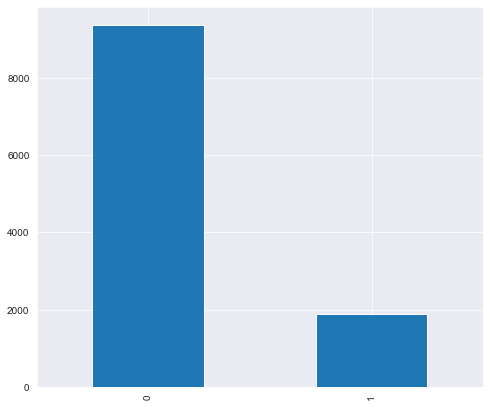

In [10]:
df['Churn'].value_counts().plot(kind='bar',figsize=(8,7))

# 2. Identify the data type of the variables.

In [11]:
df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [12]:
df["Churn"] = df["Churn"].astype("object")
df["Complain_ly"] = df["Complain_ly"].astype("object")
df["City_Tier"] = df["City_Tier"].astype("object")
df["Service_Score"] = df["Service_Score"].astype("object")
df["CC_Agent_Score"] = df["CC_Agent_Score"].astype("object")
df["Account_user_count"] = df["Account_user_count"].astype("object")
df.dtypes

Churn                       object
Tenure                     float64
City_Tier                   object
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score               object
Account_user_count          object
account_segment             object
CC_Agent_Score              object
Marital_Status              object
rev_per_month              float64
Complain_ly                 object
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [13]:
datatype = df.dtypes
#col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
Numerical Columns : ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [14]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback'], object: ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']}

# Exploratory Data Analysis:

# Descriptive Statistics:

### 1.Dimensions of the Dataset:

In [15]:
df.shape

(11260, 18)

In [16]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

### 2.Information of the Dataframe.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_pa

### 3.Summary of the Dataframe

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260.0,2.0,0.0,9364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,11042.0,NaN,NaN,NaN,11.025086,12.879782,0.0,2.0,9.0,16.0,99.0
City_Tier,11148.0,3.0,1.0,7263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,6.0,3.0,5490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_user_count,10816.0,6.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,5,Regular Plus,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144.0,5.0,3.0,3360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.missing Values present in the Dataframe

In [19]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

### 5.Feature Replacements:

In [20]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [21]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [22]:
df.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

# Exploratory Data Analysis.

# Univariate Analysis:

## I.Categorical Variables(ordinal and nominal)

## 1.Churn

In [23]:
df["Churn"].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

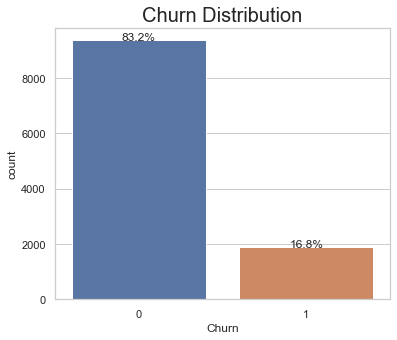

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Churn", data=df)
plt.title('Churn Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 2.City_Tier.

In [25]:
df["City_Tier"].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

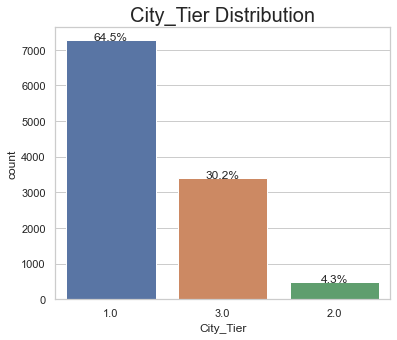

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="City_Tier", data=df)
plt.title('City_Tier Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 3.Payment

In [27]:
df["Payment"].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

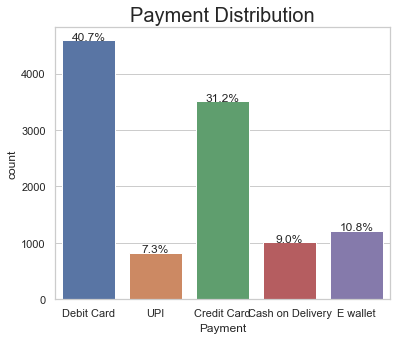

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Payment", data=df)
plt.title('Payment Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 4.Gender

In [29]:
df["Gender"].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

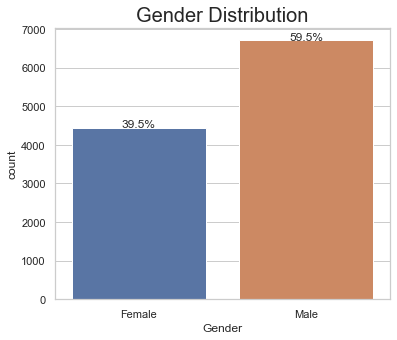

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Gender", data=df)
plt.title('Gender Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 5.Service_Score

In [31]:
df["Service_Score"].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

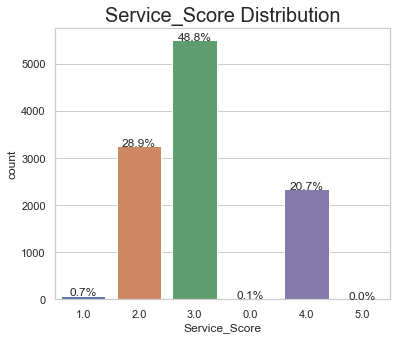

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Service_Score", data=df)
plt.title('Service_Score Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 6.Account_user_count

In [33]:
df["Account_user_count"].value_counts()

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

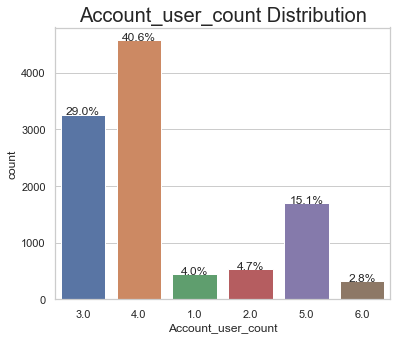

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Account_user_count", data=df)
plt.title('Account_user_count Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 7.account_segment

In [35]:
df["account_segment"].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

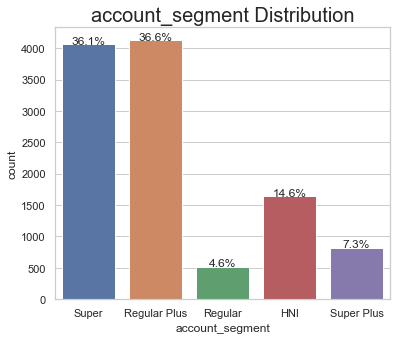

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="account_segment", data=df)
plt.title('account_segment Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 8.CC_Agent_Score

In [37]:
df["CC_Agent_Score"].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

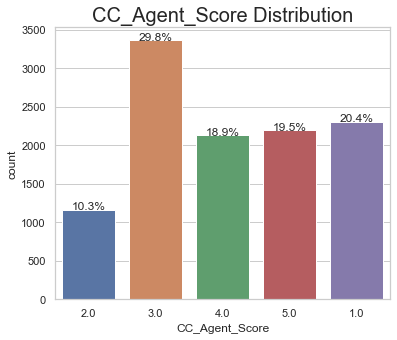

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="CC_Agent_Score", data=df)
plt.title('CC_Agent_Score Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 9.Marital_Status

In [39]:
df["Marital_Status"].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

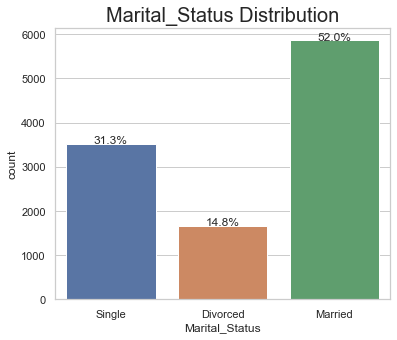

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Marital_Status", data=df)
plt.title('Marital_Status Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 10.Complain_ly

In [41]:
df["Complain_ly"].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

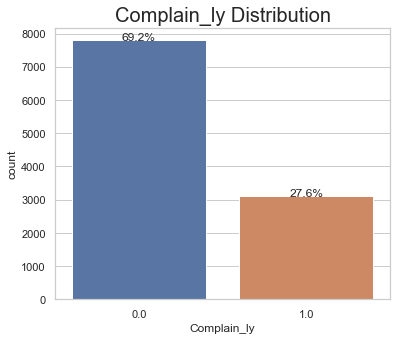

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Complain_ly", data=df)
plt.title('Complain_ly Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 11.Login_device

In [43]:
df["Login_device"].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

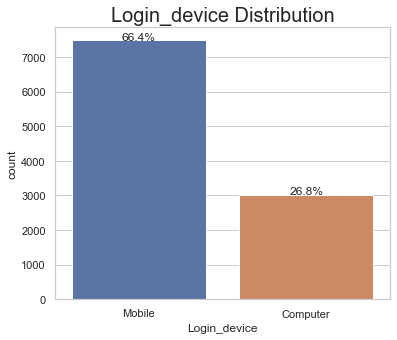

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))
total = float(len(df))
ax = sns.countplot(x="Login_device", data=df)
plt.title('Login_device Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Continous Variables:

## 1.Tenure

In [45]:
df["Tenure"].describe()

count    11042.000000
mean        11.025086
std         12.879782
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

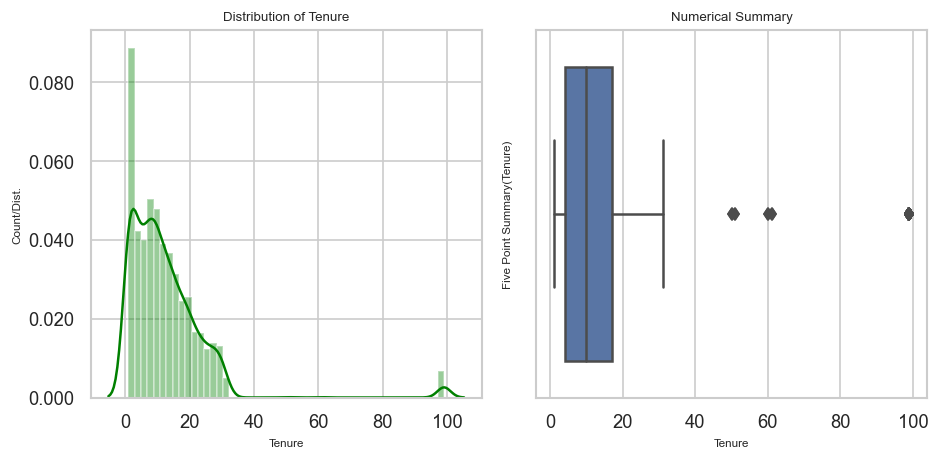

In [46]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Tenure']!=0]['Tenure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Tenure',fontdict={'fontsize':8})
axes[0].set_xlabel('Tenure',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Tenure']!=0]['Tenure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Tenure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Tenure)',fontdict={'fontsize':7})
plt.tight_layout()

## 2.CC_Contacted_LY

In [47]:
df["CC_Contacted_LY"].describe()

count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64

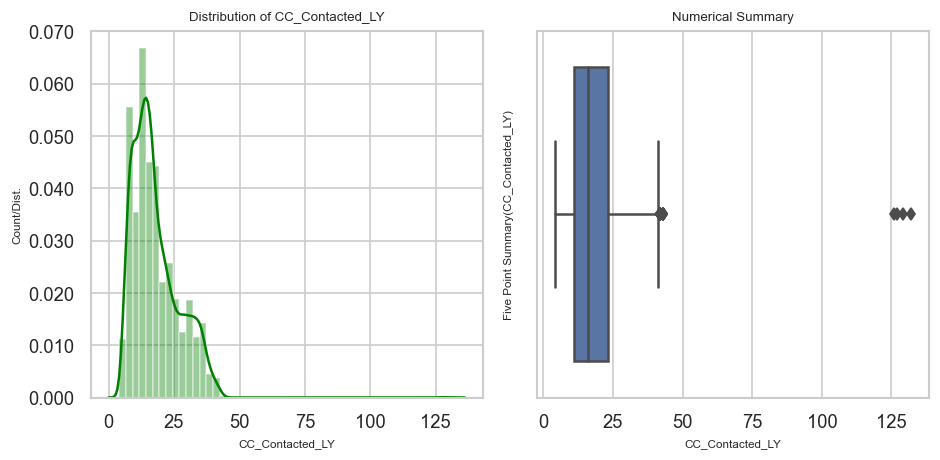

In [48]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['CC_Contacted_LY']!=0]['CC_Contacted_LY'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of CC_Contacted_LY',fontdict={'fontsize':8})
axes[0].set_xlabel('CC_Contacted_LY',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['CC_Contacted_LY']!=0]['CC_Contacted_LY'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('CC_Contacted_LY',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(CC_Contacted_LY)',fontdict={'fontsize':7})
plt.tight_layout()

## 3.rev_per_month

In [49]:
df["rev_per_month"].describe()

count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64

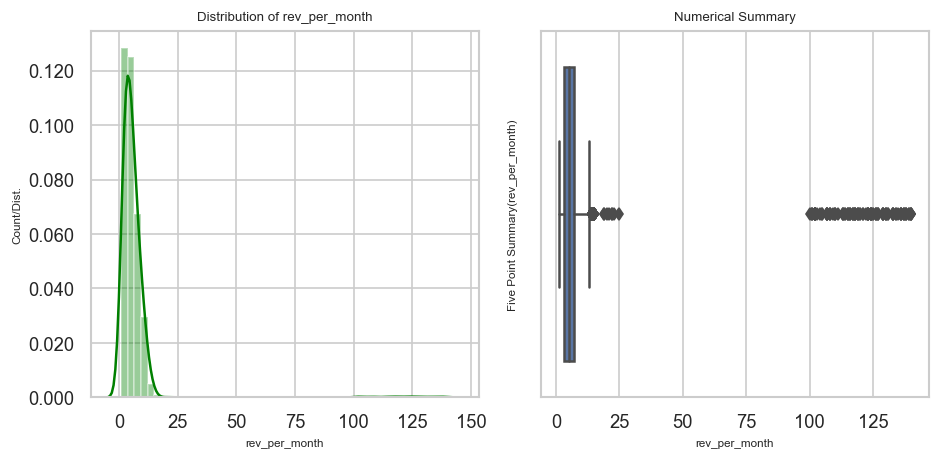

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['rev_per_month']!=0]['rev_per_month'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of rev_per_month',fontdict={'fontsize':8})
axes[0].set_xlabel('rev_per_month',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['rev_per_month']!=0]['rev_per_month'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('rev_per_month',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(rev_per_month)',fontdict={'fontsize':7})
plt.tight_layout()

## 4.rev_growth_yoy

In [51]:
df["rev_growth_yoy"].describe()

count    11257.000000
mean        16.193391
std          3.757721
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64

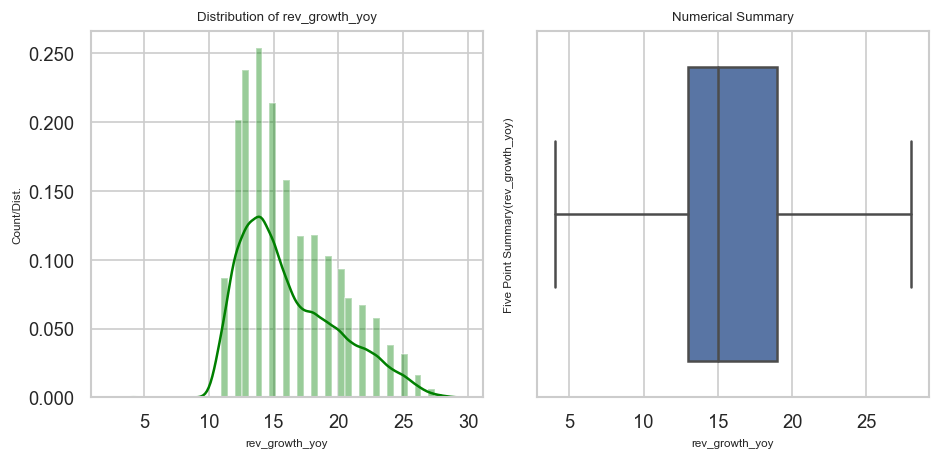

In [52]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['rev_growth_yoy']!=0]['rev_growth_yoy'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of rev_growth_yoy',fontdict={'fontsize':8})
axes[0].set_xlabel('rev_growth_yoy',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['rev_growth_yoy']!=0]['rev_growth_yoy'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('rev_growth_yoy',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(rev_growth_yoy)',fontdict={'fontsize':7})
plt.tight_layout()

## 5.coupon_used_For_payment

In [53]:
df["coupon_used_for_payment"].describe()

count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64

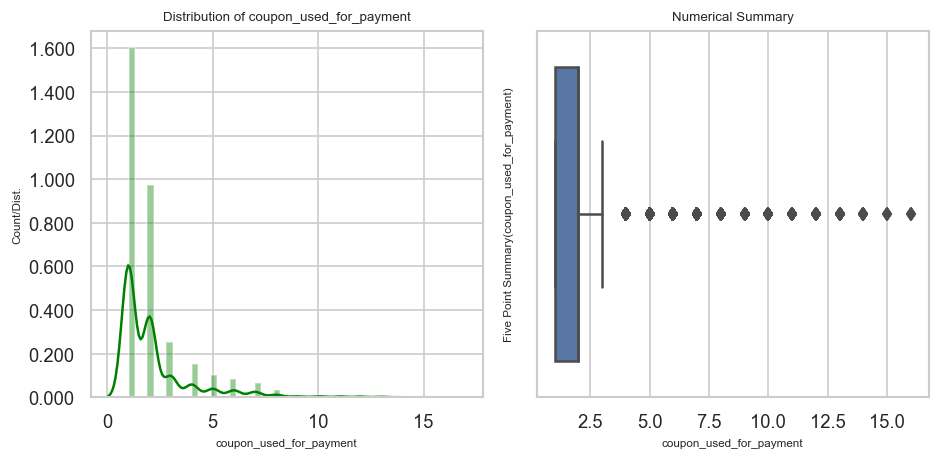

In [54]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['coupon_used_for_payment']!=0]['coupon_used_for_payment'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of coupon_used_for_payment',fontdict={'fontsize':8})
axes[0].set_xlabel('coupon_used_for_payment',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['coupon_used_for_payment']!=0]['coupon_used_for_payment'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('coupon_used_for_payment',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(coupon_used_for_payment)',fontdict={'fontsize':7})
plt.tight_layout()

## 6.Day_Since_CC_connect

In [55]:
df["Day_Since_CC_connect"].describe()

count    10902.000000
mean         4.633187
std          3.697637
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64

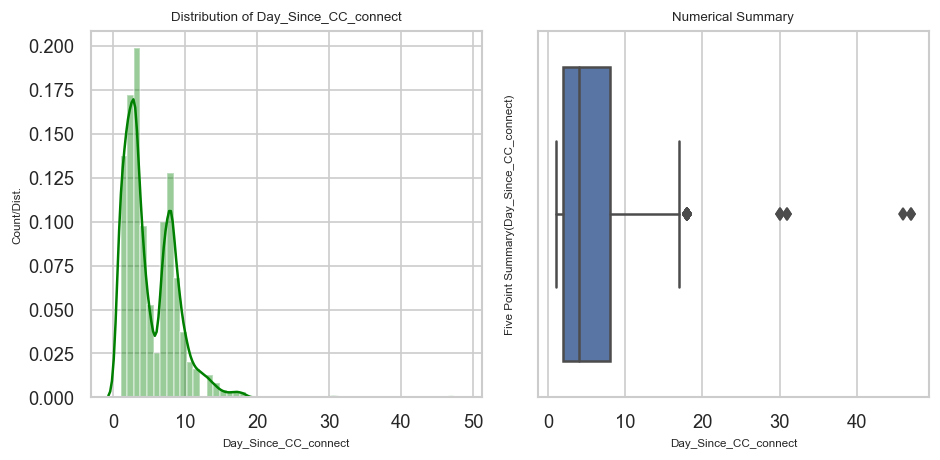

In [56]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Day_Since_CC_connect']!=0]['Day_Since_CC_connect'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Day_Since_CC_connect',fontdict={'fontsize':8})
axes[0].set_xlabel('Day_Since_CC_connect',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Day_Since_CC_connect']!=0]['Day_Since_CC_connect'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Day_Since_CC_connect',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Day_Since_CC_connect)',fontdict={'fontsize':7})
plt.tight_layout()

## 7.cashback

In [57]:
df["cashback"].describe()

count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64

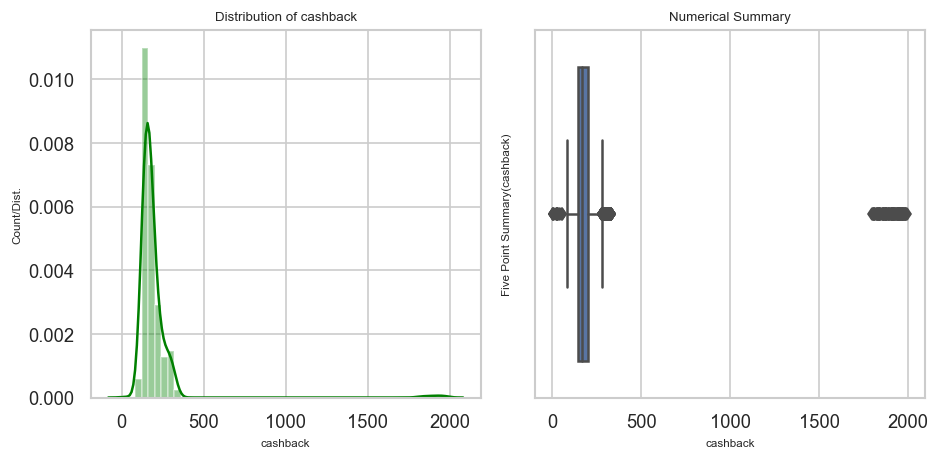

In [58]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['cashback']!=0]['cashback'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of cashback',fontdict={'fontsize':8})
axes[0].set_xlabel('cashback',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['cashback']!=0]['cashback'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('cashback',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(cashback)',fontdict={'fontsize':7})
plt.tight_layout()

# BI-VARIATE ANALYSIS

#  Churn Across Categorical Variables:

## Chi squared test for independence.

#### Hypothesis :

Null hypothesis: There is no relationship between two categorical variables Alternate hypothesis: There is a relationship between two categorical variables

## Chi2 test for Gender and Churn

In [59]:
Gender_churn_ct = pd.crosstab(index = df['Gender'], columns = df['Churn'])
Gender_churn_ct

Churn,0,1
Gender,,
Female,3759,689
Male,5519,1185


In [60]:
Gender_churn_ct.iloc[0].values, Gender_churn_ct.iloc[1].values

(array([3759,  689], dtype=int64), array([5519, 1185], dtype=int64))

In [61]:
from scipy import stats

In [62]:
(chi2, p, dof, _) = stats.chi2_contingency([Gender_churn_ct.iloc[0].values, Gender_churn_ct.iloc[1].values])

In [63]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   8.983145746725429
p-value    :   0.0027248115020348197
degree of freedom    :   1


In [64]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [65]:
op_table = pd.DataFrame(columns=['Variable','chi2','p-value','chi2_output'])

In [66]:
op_table

,Variable,chi2,p-value,chi2_output


In [67]:
dict = {'Variable':'Gender', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.


## Chi2 test for Service_Score

In [68]:
variable = 'Service_Score'

In [69]:
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Service_Score,,
0.0,8,0
1.0,77,0
2.0,2701,550
3.0,4554,936
4.0,1937,394
5.0,5,0


In [70]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values, variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   18.41468968297087
p-value    :   0.002469165780736688
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.
1,Service_Score,18.414690,0.002469,Reject Ho; Dependent.


## Chi2 test for City_Tier

In [71]:
variable = 'City_Tier'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
City_Tier,,
1.0,6207,1056
2.0,384,96
3.0,2678,727


In [72]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   80.28881725426068
p-value    :   3.677095031246197e-18
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.


## Chi2 test for Payment

In [73]:
variable = 'Payment'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Payment,,
Cash on Delivery,760,254
Credit Card,3012,499
Debit Card,3885,702
E wallet,941,276
UPI,679,143


In [74]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   103.7996168922195
p-value    :   1.526348412908852e-21
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.


## Chi2 test for Account_user_count

In [75]:
variable = 'Account_user_count'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Account_user_count,,
1.0,402,44
2.0,478,48
3.0,2772,489
4.0,3811,758
5.0,1317,382
6.0,206,109


In [76]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values,variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   154.95944512866276
p-value    :   1.1735736543478535e-31
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.


## Chi2 test for account_segment

In [77]:
variable = 'account_segment'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
account_segment,,
HNI,1384,255
Regular,480,40
Regular Plus,2997,1127
Super,3646,416
Super Plus,778,40


In [78]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   567.0684021977117
p-value    :   2.073936753745742e-121
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.


## Chi2 test for CC_Agent_Score

In [79]:
variable = 'CC_Agent_Score'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
CC_Agent_Score,,
1.0,2038,264
2.0,1017,147
3.0,2783,577
4.0,1763,364
5.0,1669,522


In [80]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   139.03156455862975
p-value    :   4.54952105322674e-29
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.


## Chi2 test for Marital_Status

In [81]:
variable = 'Marital_Status'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Marital_Status,,
Divorced,1424,244
Married,5187,673
Single,2573,947


In [82]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   379.8081234819416
p-value    :   3.355165093920422e-83
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.


## Chi2 test for Login_Device

In [83]:
variable = 'Login_device'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Login_device,,
Computer,2421,597
Mobile,6310,1172


In [84]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   25.72692788915821
p-value    :   3.933008391648881e-07
degree of freedom    :   1
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.
8,Login_device,25.726928,3.933008e-07,Reject Ho; Dependent.


## Chi2 test for Complain_ly

In [85]:
variable = 'Complain_ly'
variable_churn_ct = pd.crosstab(index = df[variable], columns = df['Churn'])
variable_churn_ct

Churn,0,1
Complain_ly,,
0.0,6942,850
1.0,2123,988


In [86]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   688.0847388901823
p-value    :   1.1662391608576675e-151
degree of freedom    :   1
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.
8,Login_device,25.726928,3.933008e-07,Reject Ho; Dependent.
9,Complain_ly,688.084739,1.166239e-151,Reject Ho; Dependent.


## visualization of Features after Chi-Square Test.

## 1.Churn across City_Tier:

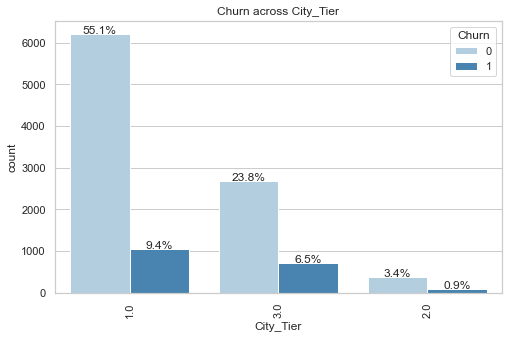

In [87]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "City_Tier",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across City_Tier")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 2.Churn across Payment:

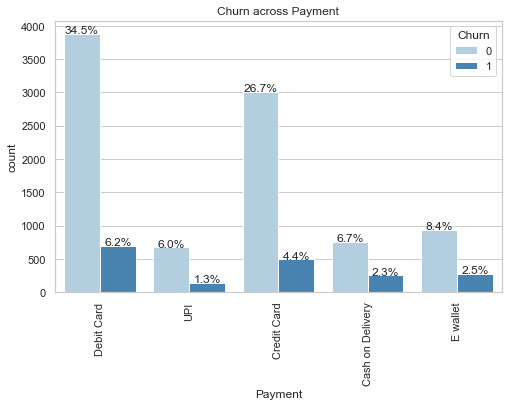

In [88]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Payment",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Payment")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 3.Churn across Gender:

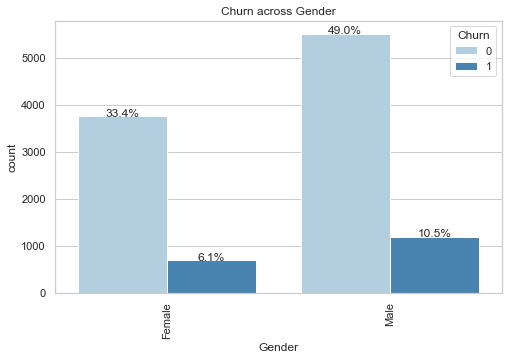

In [89]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Gender",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Gender")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 4.Churn across Service_Score:

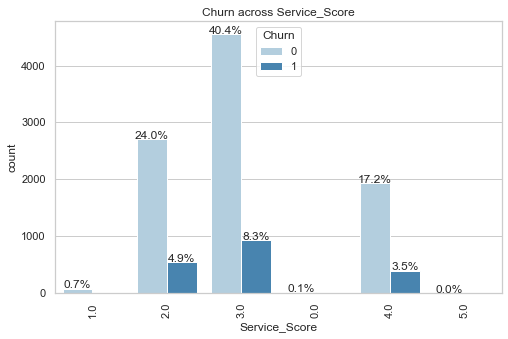

In [90]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Service_Score",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Service_Score")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 5.Churn across Account_user_count:

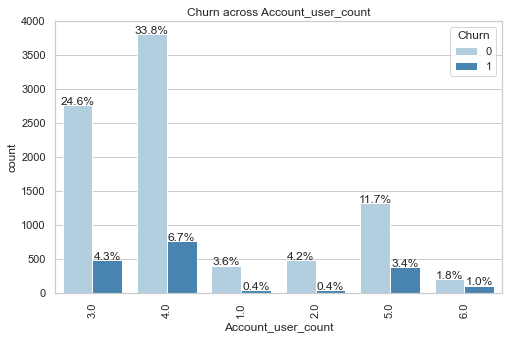

In [91]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Account_user_count",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Account_user_count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 6.Churn across account_segment:

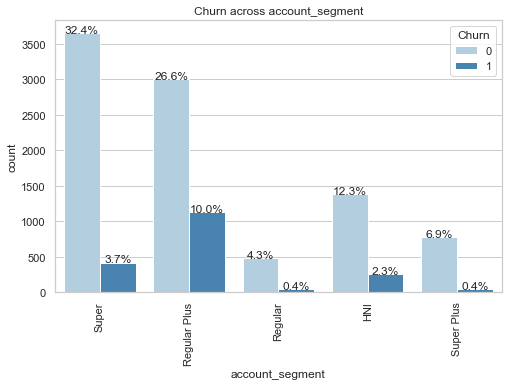

In [92]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "account_segment",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across account_segment")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 7.Churn across CC_Agent_Score:

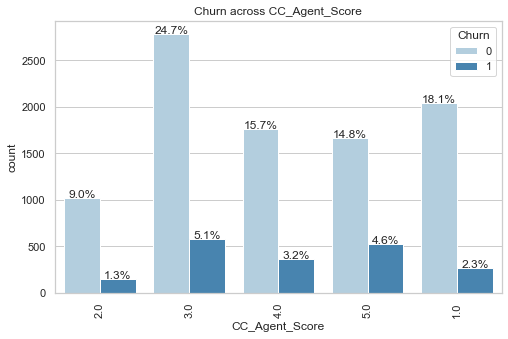

In [93]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "CC_Agent_Score",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across CC_Agent_Score")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 8.Churn across Marital_Status:

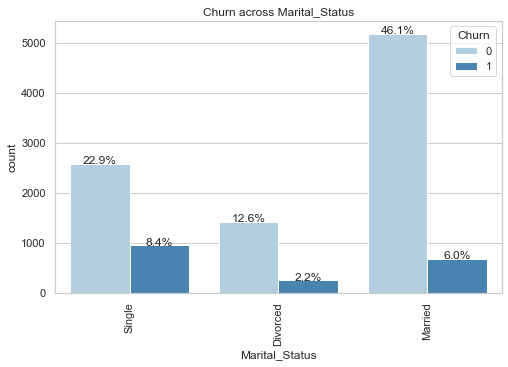

In [94]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Marital_Status",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Marital_Status")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.0
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 9.Churn across Complain_ly:

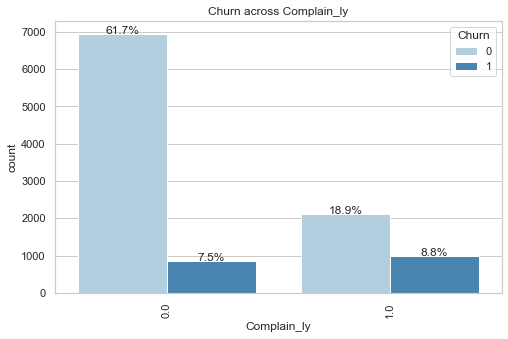

In [95]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Complain_ly",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Complain_ly")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 10.Churn across Login_device:

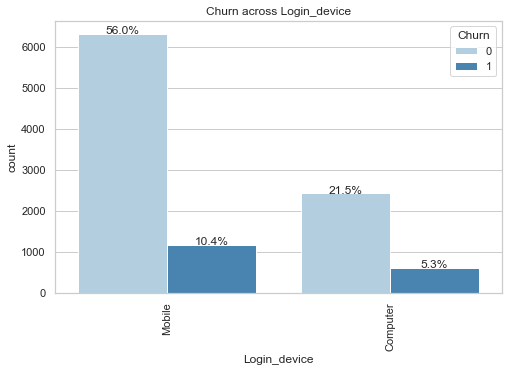

In [96]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax = sns.countplot(ax=ax1,data=df,x = "Login_device",hue="Churn",palette="Blues")
ax.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax.set_title("Churn across Login_device")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2.
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Churn across Continous Variables:

## One-way Anova Hypothesis test :

𝐻𝑜:𝜇1=𝜇2 Means for churn=0 and churn=1 observations with respect to the predictor variable are the same.

𝐻𝑎 : Means for the churn=0 and churn=1 with respect to the predictor variable are not equal.

In [97]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [98]:
num_col

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [99]:
## Anova for Churn vs Tenure

formula = 'Tenure ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.956283e+04,99562.834286,634.621266,3.320121e-136
Residual,11040.0,1.732015e+06,156.885436,NaN,NaN


In [100]:
## Anova for Churn vs CC_Contacted_LY

formula = 'CC_Contacted_LY ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,4542.363574,4542.363574,58.250189,2.496284e-14
Residual,11156.0,869947.532195,77.980238,NaN,NaN


In [101]:
## Anova for Churn vs rev_per_month

formula = 'rev_per_month ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,7.542129e+02,754.212873,5.319521,0.021107
Residual,10467.0,1.484033e+06,141.782113,NaN,NaN


In [102]:
## Anova for Churn vs rev_growth_yoy

formula = 'rev_growth_yoy ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,30.605488,30.605488,2.16768,0.140967
Residual,11255.0,158909.382786,14.119003,NaN,NaN


In [103]:
## Anova for Churn vs coupon_used_for_payment

formula = 'coupon_used_for_payment ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.597780,9.597780,2.474533,0.115732
Residual,11255.0,43653.891604,3.878622,NaN,NaN


In [104]:
## Anova for Churn vs Day_Since_CC_connect

formula = 'Day_Since_CC_connect ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3262.738668,3262.738668,243.953328,2.097172e-54
Residual,10900.0,145781.374431,13.374438,NaN,NaN


In [105]:
## Anova for Churn vs cashback

formula = 'cashback ~ C(Churn)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3.610195e+05,361019.455313,11.321105,0.000769
Residual,10785.0,3.439236e+08,31889.064508,NaN,NaN


## visualisation of Features after ANOVA Test:

## 1.Churn across Tenure:

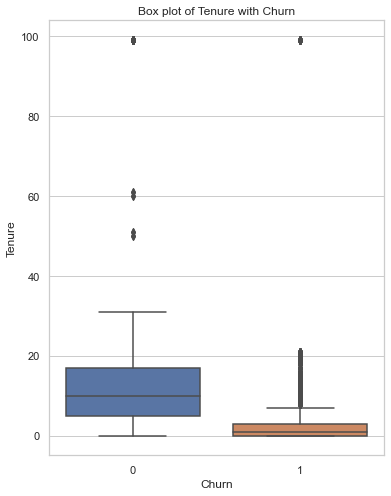

In [106]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df, y='Tenure', x='Churn')
plot_title = "Box plot of Tenure with Churn"
plt.title(plot_title)
plt.show();

## 2.Churn across CC_Contacted_LY:

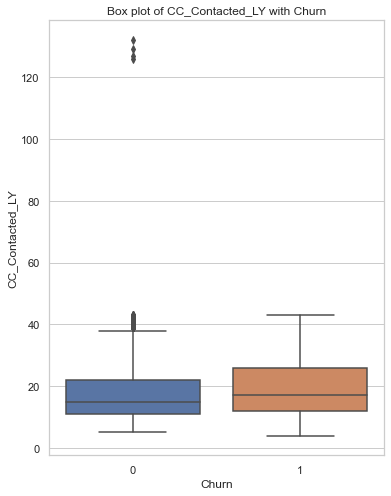

In [107]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df, y='CC_Contacted_LY', x='Churn')
plot_title = "Box plot of CC_Contacted_LY with Churn"
plt.title(plot_title)
plt.show();

## 3.Churn across rev_per_month:

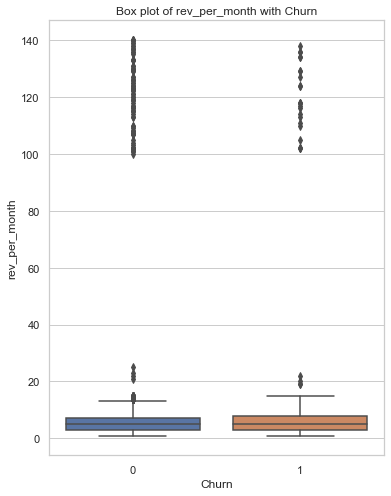

In [108]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df, y='rev_per_month', x='Churn')
plot_title = "Box plot of rev_per_month with Churn"
plt.title(plot_title)
plt.show();

## 4.Churn across Day_Since_CC_connect:

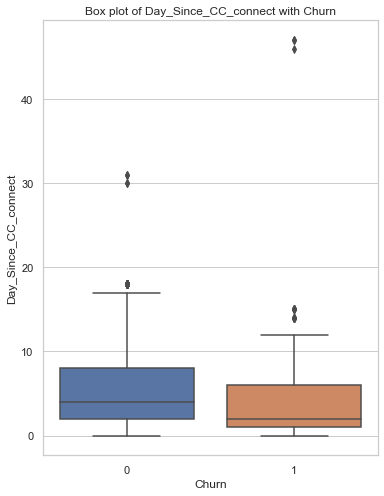

In [109]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df, y='Day_Since_CC_connect', x='Churn')
plot_title = "Box plot of Day_Since_CC_connect with Churn"
plt.title(plot_title)
plt.show();

## 5.Churn across cashback:

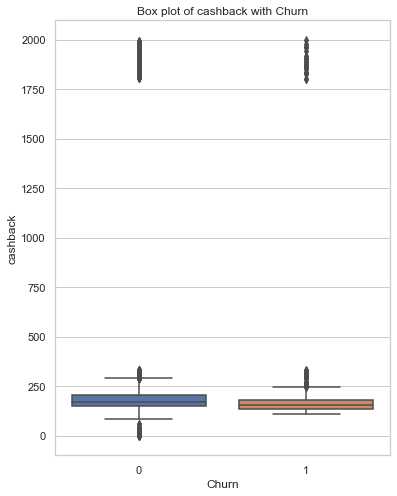

In [110]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df, y='cashback', x='Churn')
plot_title = "Box plot of cashback with Churn"
plt.title(plot_title)
plt.show();

In [111]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

# Multi-Variate Analysis

In [112]:
pair = df[num_col]

In [113]:
pair['Churn'] = df['Churn']

C:\Users\GANAPA~1\AppData\Local\Temp/ipykernel_20036/334344981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair['Churn'] = df['Churn']


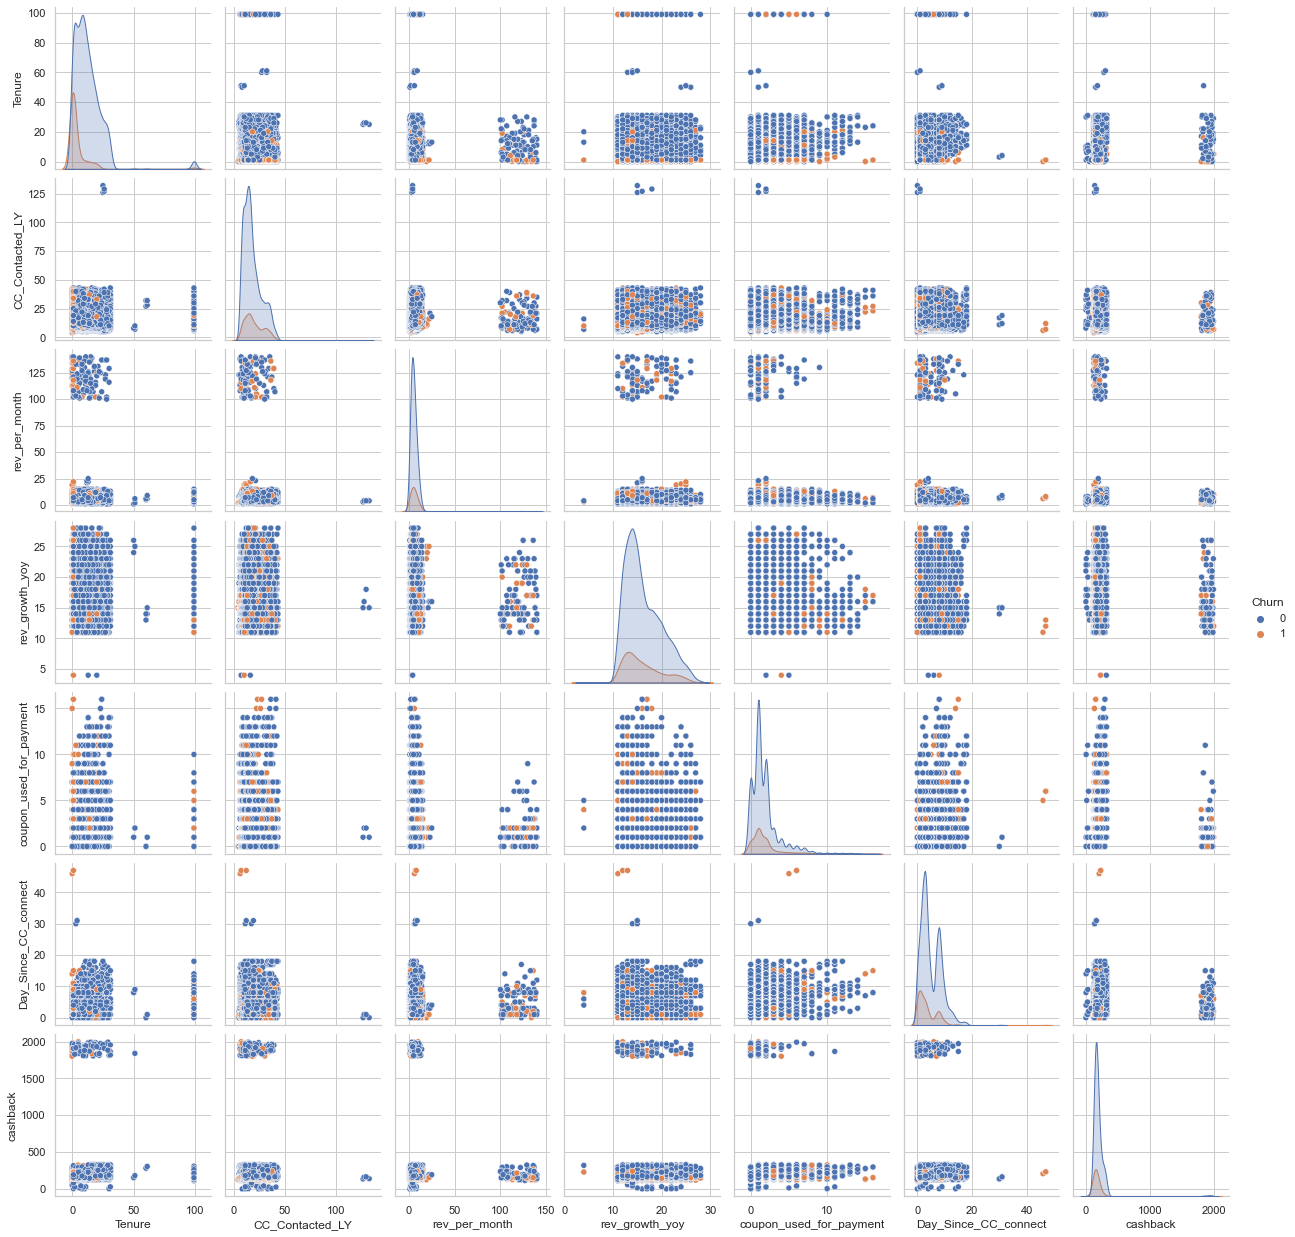

In [114]:
sns.pairplot(data=pair, hue='Churn');

## Correlation Matrix

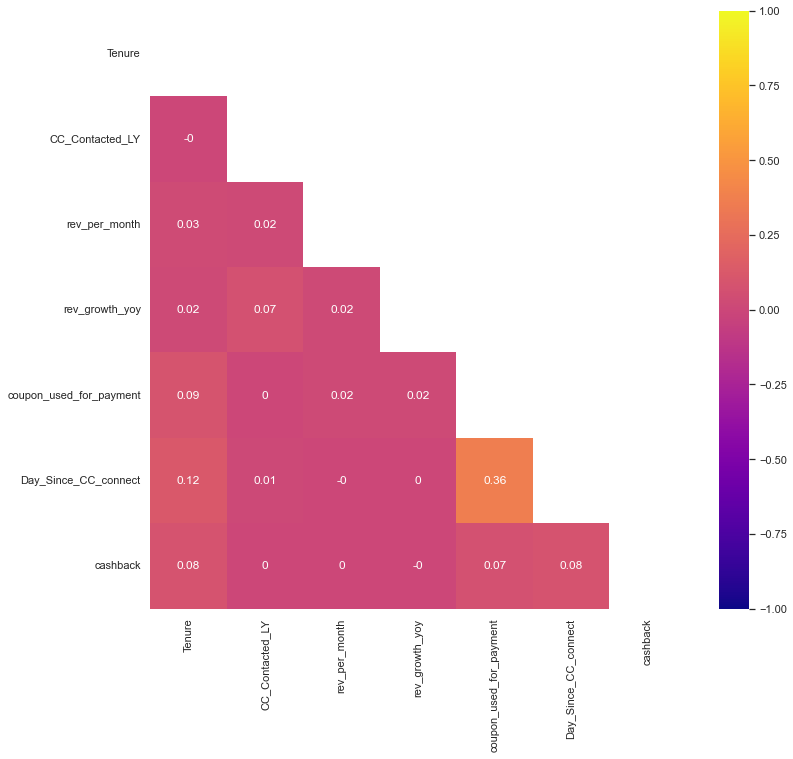

In [115]:
df_num = df[num_col]
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))

plt.figure(figsize = (12,11))
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap='plasma', vmin=-1, vmax=1, annot_kws={'size':12});

# Feature Cleaning:

# Outliers:

## 1(a).Identifying the Outliers Using Box Plots And Distribution Plots.

In [116]:
features = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
features

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

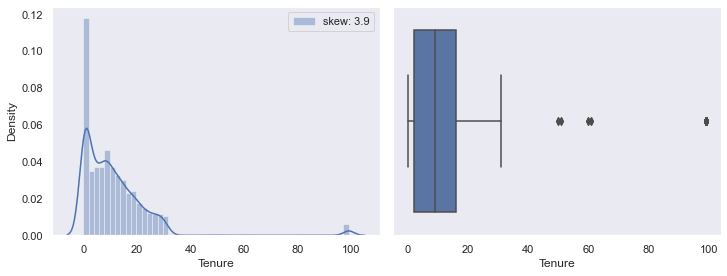

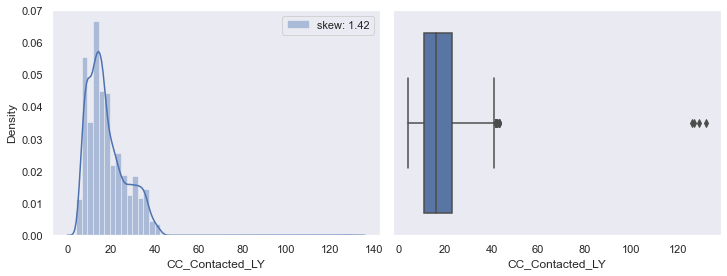

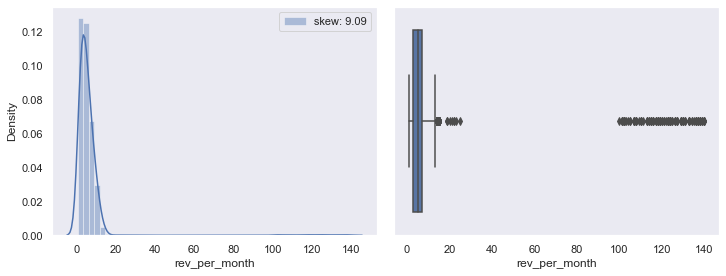

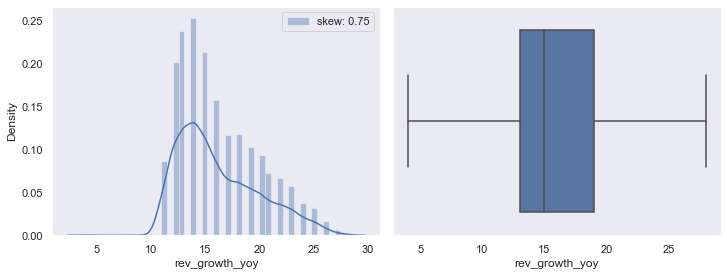

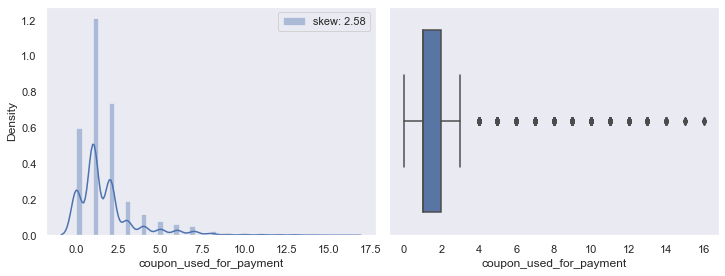

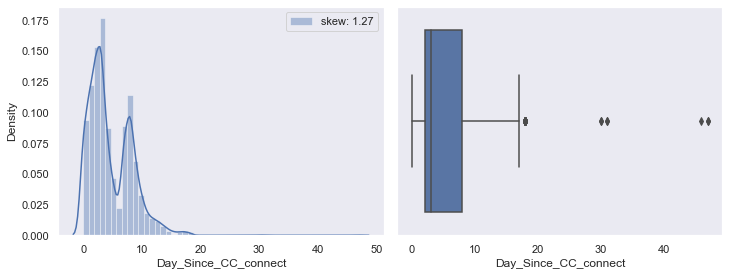

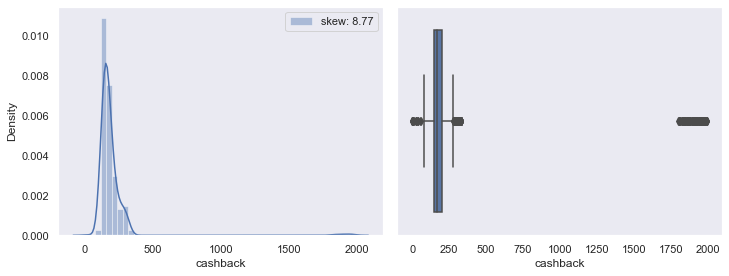

In [117]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

## 2.Outlier Treatment using Capping Methods (Winsorization Method):

### Tenure:

In [118]:
min_threshold, max_threshold = df.Tenure.quantile([0.05,0.95])
min_threshold, max_threshold

(0.0, 28.0)

In [119]:
# Capping --> Winsorization
df['Tenure'] = np.where(df['Tenure'] >= max_threshold,
        max_threshold,
        np.where(df['Tenure'] <= min_threshold,
        min_threshold,
        df['Tenure']))

In [120]:
df.shape

(11260, 18)

In [121]:
df.Tenure.describe()

count    11042.000000
mean        10.101612
std          8.553714
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: Tenure, dtype: float64

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

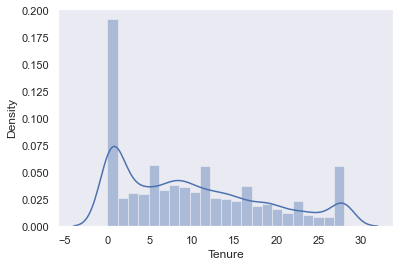

In [122]:
sns.distplot(df['Tenure'])

<AxesSubplot:xlabel='Tenure'>

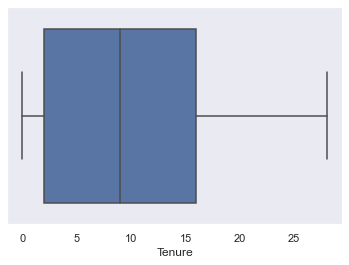

In [123]:
sns.boxplot(df['Tenure'])

### CC_Contacted_LY:

In [124]:
min_threshold, max_threshold = df.CC_Contacted_LY.quantile([0.05,0.95])
min_threshold, max_threshold

(7.0, 35.0)

In [125]:
# Capping --> Winsorization
df['CC_Contacted_LY'] = np.where(df['CC_Contacted_LY'] >= max_threshold,
        max_threshold,
        np.where(df['CC_Contacted_LY'] <= min_threshold,
        min_threshold,
        df['CC_Contacted_LY']))

In [126]:
df.shape

(11260, 18)

In [127]:
df.CC_Contacted_LY.describe()

count    11158.000000
mean        17.732569
std          8.268528
min          7.000000
25%         11.000000
50%         16.000000
75%         23.000000
max         35.000000
Name: CC_Contacted_LY, dtype: float64

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='Density'>

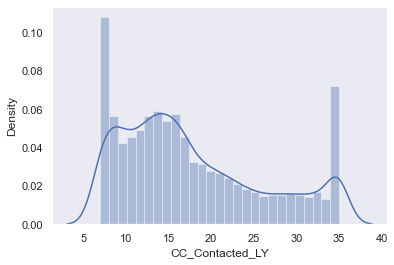

In [128]:
sns.distplot(df['CC_Contacted_LY'])

<AxesSubplot:xlabel='CC_Contacted_LY'>

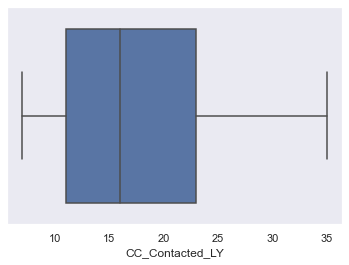

In [129]:
sns.boxplot(df['CC_Contacted_LY'])

### Account_user_count:

In [130]:
min_threshold, max_threshold = df.Account_user_count.quantile([0.05,0.95])
min_threshold, max_threshold

(2.0, 5.0)

In [131]:
# Capping --> Winsorization
df['Account_user_count'] = np.where(df['Account_user_count'] >= max_threshold,
        max_threshold,
        np.where(df['Account_user_count'] <= min_threshold,
        min_threshold,
        df['Account_user_count']))

In [132]:
df.shape

(11260, 18)

In [133]:
df.Account_user_count.describe()

count     10816.0
unique        4.0
top           4.0
freq       4569.0
Name: Account_user_count, dtype: float64

<AxesSubplot:xlabel='Account_user_count', ylabel='Density'>

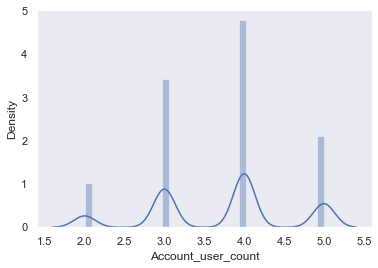

In [134]:
sns.distplot(df['Account_user_count'])

<AxesSubplot:xlabel='Account_user_count'>

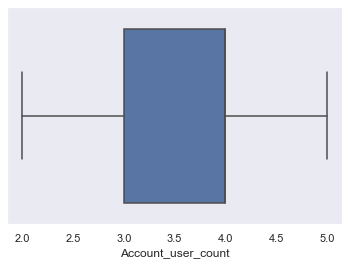

In [135]:
sns.boxplot(df['Account_user_count'])

### rev_per_month:

In [136]:
min_threshold, max_threshold = df.rev_per_month.quantile([0.05,0.95])
min_threshold, max_threshold

(2.0, 11.0)

In [137]:
# Capping --> Winsorization
df['rev_per_month'] = np.where(df['rev_per_month'] >= max_threshold,
        max_threshold,
        np.where(df['rev_per_month'] <= min_threshold,
        min_threshold,
        df['rev_per_month']))

In [138]:
df.shape

(11260, 18)

In [139]:
df.rev_per_month.describe()

count    10469.000000
mean         5.239182
std          2.776806
min          2.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: rev_per_month, dtype: float64

<AxesSubplot:xlabel='rev_per_month', ylabel='Density'>

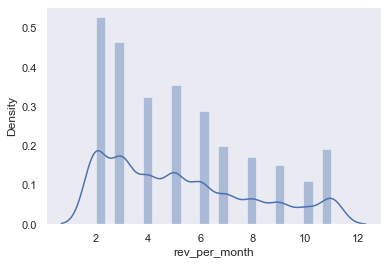

In [140]:
sns.distplot(df['rev_per_month'])

<AxesSubplot:xlabel='rev_per_month'>

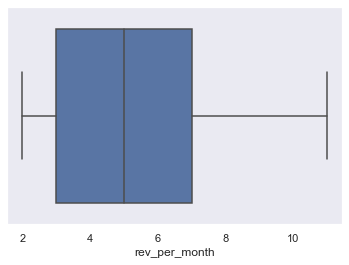

In [141]:
sns.boxplot(df['rev_per_month'])

### coupon_used_for_payment:

In [142]:
min_threshold, max_threshold = df.coupon_used_for_payment.quantile([0.10,0.90])
min_threshold, max_threshold

(0.0, 4.0)

In [143]:
# Capping --> Winsorization
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment'] >= max_threshold,
        max_threshold,
        np.where(df['coupon_used_for_payment'] <= min_threshold,
        min_threshold,
        df['coupon_used_for_payment']))

In [144]:
df.shape

(11260, 18)

In [145]:
df.coupon_used_for_payment.describe()

count    11257.000000
mean         1.536733
std          1.220787
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: coupon_used_for_payment, dtype: float64

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='Density'>

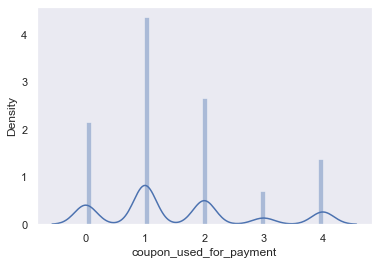

In [146]:
sns.distplot(df['coupon_used_for_payment'])

<AxesSubplot:xlabel='coupon_used_for_payment'>

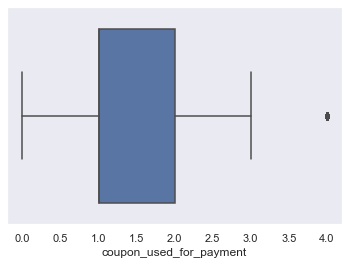

In [147]:
sns.boxplot(df['coupon_used_for_payment'])

### Day_Since_CC_connect:

In [148]:
min_threshold, max_threshold = df.Day_Since_CC_connect.quantile([0.05,0.95])
min_threshold, max_threshold

(0.0, 11.0)

In [149]:
# Capping --> Winsorization
df['Day_Since_CC_connect'] = np.where(df['Day_Since_CC_connect'] >= max_threshold,
        max_threshold,
        np.where(df['Day_Since_CC_connect'] <= min_threshold,
        min_threshold,
        df['Day_Since_CC_connect']))

In [150]:
df.shape

(11260, 18)

In [151]:
df.Day_Since_CC_connect.describe()

count    10902.000000
mean         4.500092
std          3.318070
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         11.000000
Name: Day_Since_CC_connect, dtype: float64

<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='Density'>

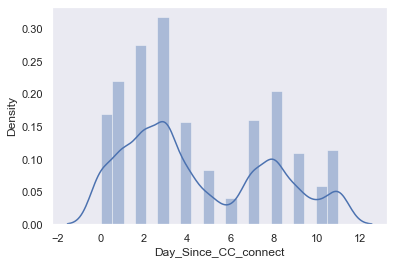

In [152]:
sns.distplot(df['Day_Since_CC_connect'])

<AxesSubplot:xlabel='Day_Since_CC_connect'>

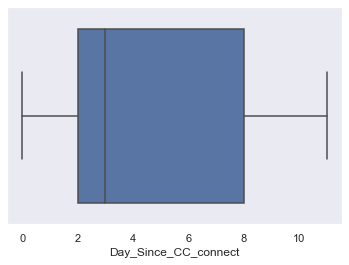

In [153]:
sns.boxplot(df['Day_Since_CC_connect'])

### cashback:

In [154]:
min_threshold, max_threshold = df.cashback.quantile([0.10,0.90])
min_threshold, max_threshold

(128.556, 265.296)

In [155]:
# Capping --> Winsorization
df['cashback'] = np.where(df['cashback'] >= max_threshold,
        max_threshold,
        np.where(df['cashback'] <= min_threshold,
        min_threshold,
        df['cashback']))

In [156]:
df.shape

(11260, 18)

In [157]:
df.cashback.describe()

count    10787.000000
mean       177.821081
std         42.454245
min        128.556000
25%        147.210000
50%        165.250000
75%        200.010000
max        265.296000
Name: cashback, dtype: float64

<AxesSubplot:xlabel='cashback', ylabel='Density'>

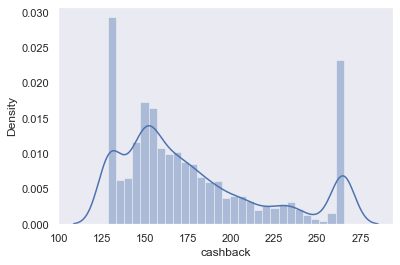

In [158]:
sns.distplot(df['cashback'])

<AxesSubplot:xlabel='cashback'>

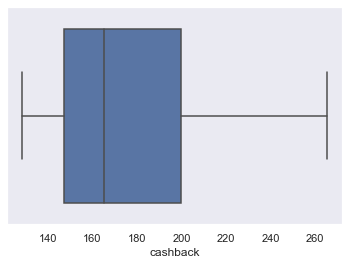

In [159]:
sns.boxplot(df['cashback'])

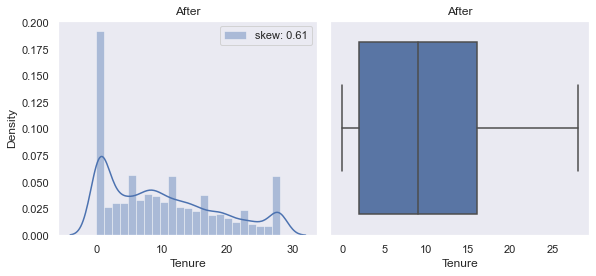

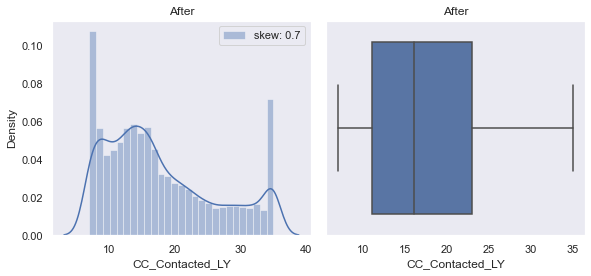

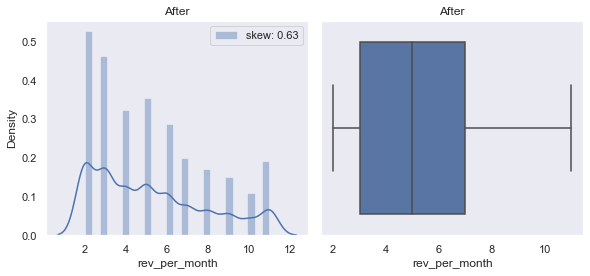

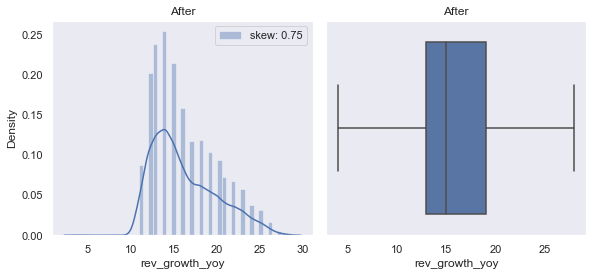

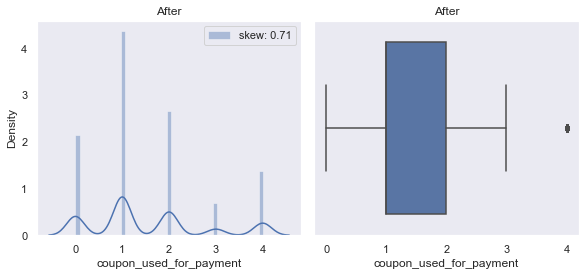

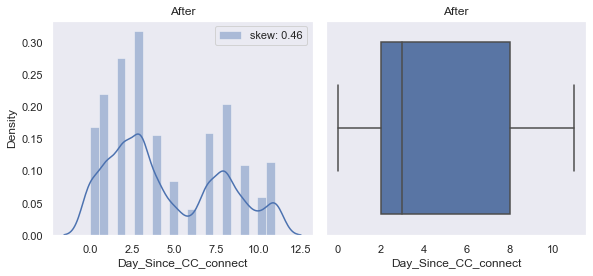

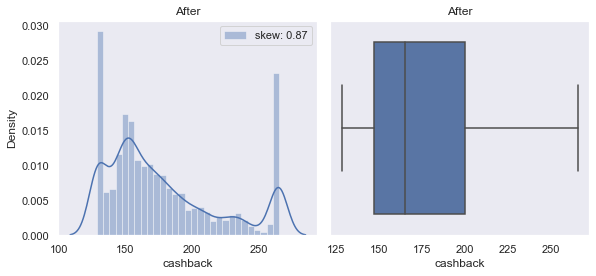

In [160]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(142)
    sns.boxplot(df[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Missing Values:

## 1.Identifying The Missing Values In the Dataset

In [161]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [162]:
df.isnull().sum().sum()

4361

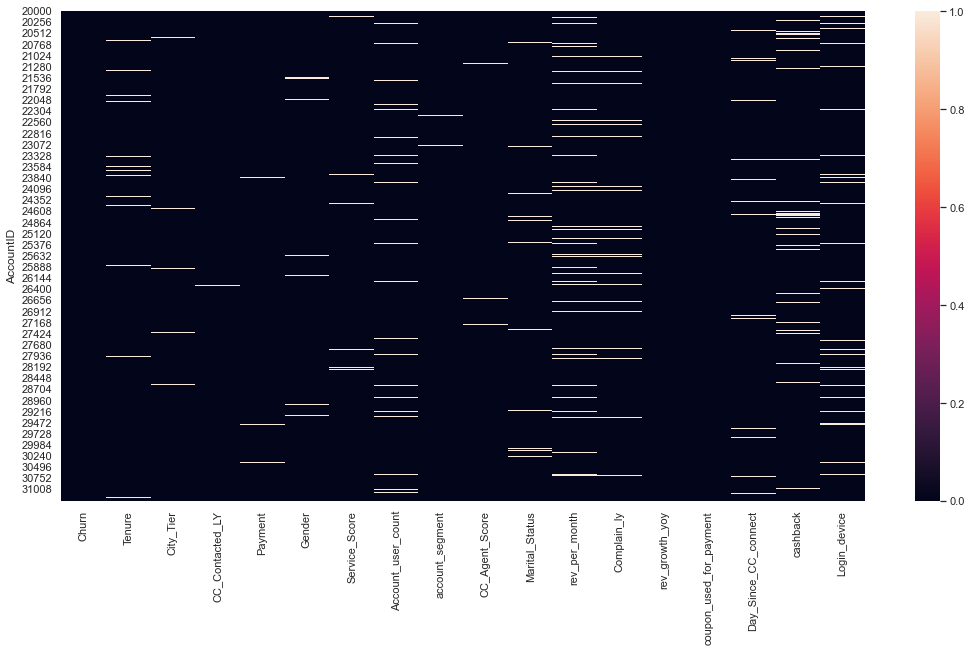

In [163]:
plt.figure(figsize = (18,9))
sns.heatmap(df.isnull())
plt.show()

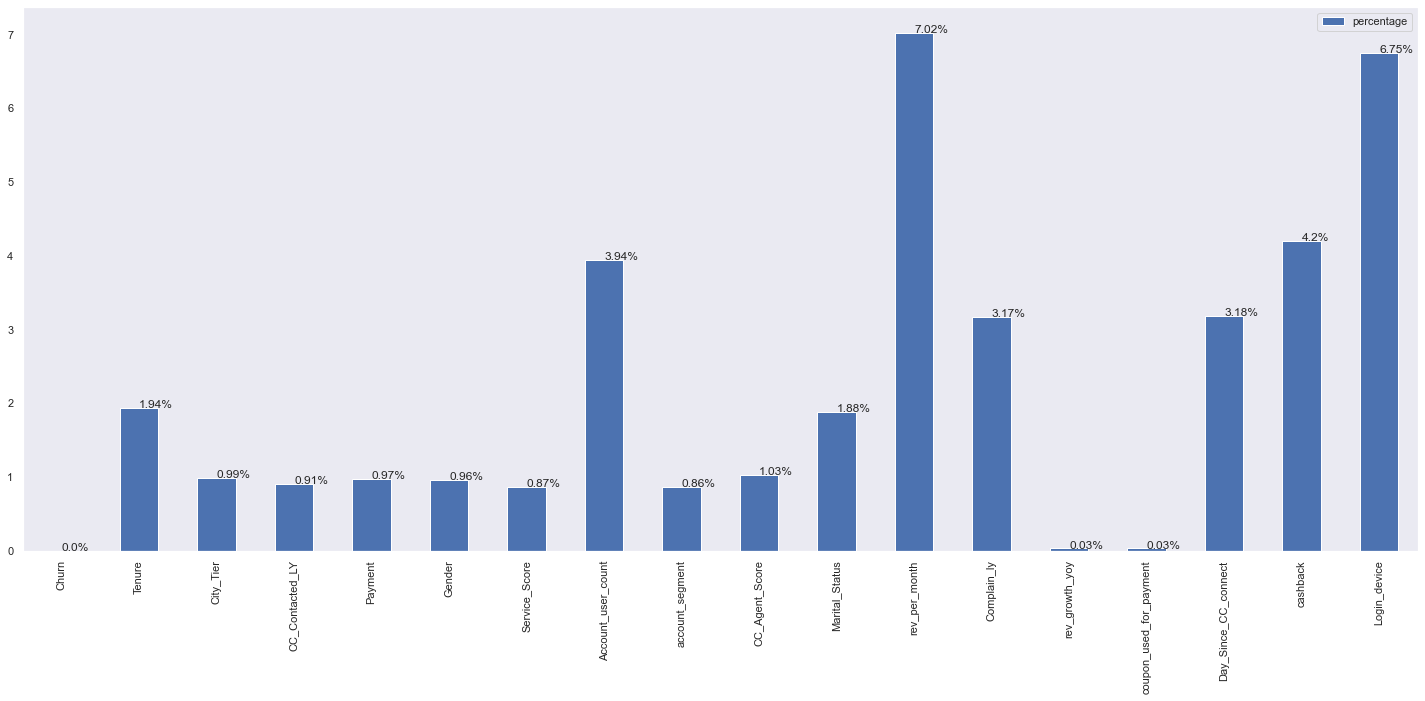

In [164]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(25,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

### Observation:
The given dataset has missing values in each columns.Total sum of missing values present in the dataset is 4361. the Above Bargraph show the percentage of missing values present in each column of the dataset. 'Revenue per month' and 'Login device' has the has highest percentage of missing values which is 7.02% and 6.75%.The lowest percentage of missing values is 'Revenue growth YOY' and 'coupon used for Payment' which is 0.03%.

## Feature Encoding

In [165]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,Mobile
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,Mobile
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,Mobile
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,Mobile


In [166]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [167]:
#Converting account_segment from categorical to numeric:
dataMapping={"Regular" : 1,
             "Regular Plus": 2,
             "Super": 3,
             "Super Plus": 4,
             "HNI": 5}

In [168]:
df['account_segment']=df['account_segment'].map(dataMapping)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,Female,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,Mobile
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,Mobile
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,Mobile
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,Mobile


In [169]:
df['account_segment'].unique()

array([ 3.,  2.,  1.,  5., nan,  4.])

In [170]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [171]:
#Converting Gender from categorical to numeric:
dataMapping={"Male" : 1,
             "Female" : 0}

In [172]:
df['Gender']=df['Gender'].map(dataMapping)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,Mobile
20001,1,0.0,1.0,8.0,UPI,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,Mobile
20002,1,0.0,1.0,30.0,Debit Card,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
20003,1,0.0,3.0,15.0,Debit Card,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,Mobile
20004,1,0.0,1.0,12.0,Credit Card,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,Mobile


In [173]:
df['Gender'].unique()

array([ 0.,  1., nan])

In [174]:
df['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [175]:
#Converting Login_device from categorical to numeric:
dataMapping={"Mobile" : 1,
             "Computer" : 0}

In [176]:
df['Login_device']=df['Login_device'].map(dataMapping)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0
20001,1,0.0,1.0,8.0,UPI,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0
20002,1,0.0,1.0,30.0,Debit Card,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0
20003,1,0.0,3.0,15.0,Debit Card,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0
20004,1,0.0,1.0,12.0,Credit Card,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0


In [177]:
df['Login_device'].unique()

array([ 1.,  0., nan])

## One Hot Encoding:

In [178]:
#convert Payment column to Numeric Column Using get dummies method
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0
20001,1,0.0,1.0,8.0,UPI,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0
20002,1,0.0,1.0,30.0,Debit Card,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0
20003,1,0.0,3.0,15.0,Debit Card,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0
20004,1,0.0,1.0,12.0,Credit Card,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0


In [179]:
dummies = pd.get_dummies(df.Payment)
dummies.head()

,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
AccountID,,,,,
20000,0,0,1,0,0
20001,0,0,0,0,1
20002,0,0,1,0,0
20003,0,0,1,0,0
20004,0,1,0,0,0


In [180]:
merged = pd.concat([df,dummies],axis='columns')
merged.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
AccountID,,,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,Debit Card,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0,0
20001,1,0.0,1.0,8.0,UPI,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0,1
20002,1,0.0,1.0,30.0,Debit Card,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0,0
20003,1,0.0,3.0,15.0,Debit Card,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0,0
20004,1,0.0,1.0,12.0,Credit Card,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0,0


In [181]:
final = merged.drop(['Payment','UPI'],axis='columns')
final.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet
AccountID,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0
20001,1,0.0,1.0,8.0,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0
20002,1,0.0,1.0,30.0,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0
20003,1,0.0,3.0,15.0,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0
20004,1,0.0,1.0,12.0,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0


In [182]:
final.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet
AccountID,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0
20001,1,0.0,1.0,8.0,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0
20002,1,0.0,1.0,30.0,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0
20003,1,0.0,3.0,15.0,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0
20004,1,0.0,1.0,12.0,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0


In [183]:
dummies1 = pd.get_dummies(final.Marital_Status)
dummies1.head()

,Divorced,Married,Single
AccountID,,,
20000,0,0,1
20001,0,0,1
20002,0,0,1
20003,0,0,1
20004,0,0,1


In [184]:
merged1 = pd.concat([final,dummies1],axis='columns')
merged1

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet,Divorced,Married,Single
AccountID,,,,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,0.0,3.0,3.0,3.0,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0,0,0,1
20001,1,0.0,1.0,8.0,1.0,3.0,4.0,2.0,3.0,Single,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0,0,0,1
20002,1,0.0,1.0,30.0,1.0,2.0,4.0,2.0,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0,0,0,1
20003,1,0.0,3.0,15.0,1.0,2.0,4.0,3.0,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0,0,0,1
20004,1,0.0,1.0,12.0,1.0,2.0,3.0,2.0,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31255,0,10.0,1.0,34.0,1.0,3.0,2.0,3.0,1.0,Married,9.0,0.0,19.0,1.0,4.0,153.710,0.0,0,1,0,0,0,1,0
31256,0,13.0,1.0,19.0,1.0,3.0,5.0,5.0,5.0,Married,7.0,0.0,16.0,1.0,8.0,226.910,1.0,0,1,0,0,0,1,0
31257,0,1.0,1.0,14.0,1.0,3.0,2.0,3.0,4.0,Married,7.0,1.0,22.0,1.0,4.0,191.420,1.0,0,0,1,0,0,1,0


In [185]:
df = merged1.drop(['Marital_Status','Divorced'],axis='columns')
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet,Married,Single
AccountID,,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,0.0,3.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0,0,1
20001,1,0.0,1.0,8.0,1.0,3.0,4.0,2.0,3.0,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0,0,1
20002,1,0.0,1.0,30.0,1.0,2.0,4.0,2.0,3.0,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0,0,1
20003,1,0.0,3.0,15.0,1.0,2.0,4.0,3.0,5.0,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0,0,1
20004,1,0.0,1.0,12.0,1.0,2.0,3.0,2.0,5.0,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0,0,1


In [186]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Cash on Delivery,Credit Card,Debit Card,E wallet,Married,Single
AccountID,,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,7.0,0.0,3.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.930,1.0,0,0,1,0,0,1
20001,1,0.0,1.0,8.0,1.0,3.0,4.0,2.0,3.0,7.0,1.0,15.0,0.0,0.0,128.556,1.0,0,0,0,0,0,1
20002,1,0.0,1.0,30.0,1.0,2.0,4.0,2.0,3.0,6.0,1.0,14.0,0.0,3.0,NaN,1.0,0,0,1,0,0,1
20003,1,0.0,3.0,15.0,1.0,2.0,4.0,3.0,5.0,8.0,0.0,23.0,0.0,3.0,134.070,1.0,0,0,1,0,0,1
20004,1,0.0,1.0,12.0,1.0,2.0,3.0,2.0,5.0,3.0,0.0,11.0,1.0,3.0,129.600,1.0,0,1,0,0,0,1


In [187]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
Cash on Delivery             0
Credit Card                  0
Debit Card                   0
E wallet                     0
Married                      0
Single                       0
dtype: int64

In [188]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [189]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
Cash on Delivery           0
Credit Card                0
Debit Card                 0
E wallet                   0
Married                    0
Single                     0
dtype: int64

In [190]:
df.shape

(11260, 22)

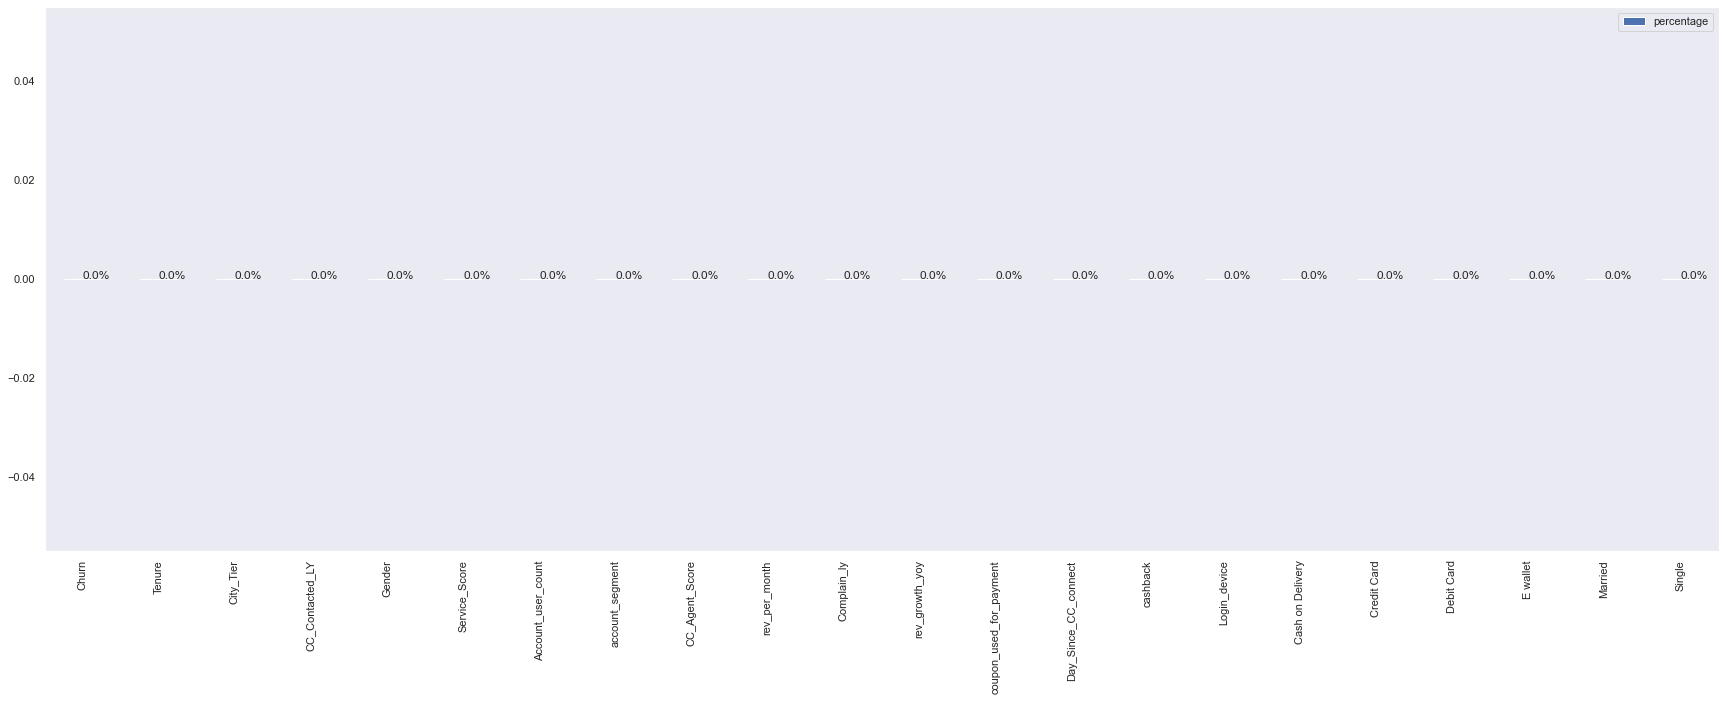

In [191]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

# Split the dataset.

In [192]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (7882, 21)
y_train (7882,)
X_test (3378, 21)
y_test (3378,)


# Feature Selection:

## 1.Univariate Selection:

In [194]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [195]:
df.shape

(11260, 21)

In [196]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [197]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [198]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [199]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Tenure,9806.026373
1,City_Tier,39.620448
2,CC_Contacted_LY,260.622237
3,Gender,3.691721
4,Service_Score,0.158923
5,Account_user_count,22.532485
6,account_segment,51.055699
7,CC_Agent_Score,76.848519
8,rev_per_month,18.780642
9,Complain_ly,487.779337


In [200]:
features_rank.nlargest(10,'Score')

,Features,Score
0,Tenure,9806.026373
13,cashback,2545.305291
12,Day_Since_CC_connect,677.075029
9,Complain_ly,487.779337
2,CC_Contacted_LY,260.622237
20,Single,254.654287
19,Married,119.946245
7,CC_Agent_Score,76.848519
6,account_segment,51.055699
15,Cash on Delivery,48.820380


## 2.Check Multicollinearity using VIF:

<AxesSubplot:>

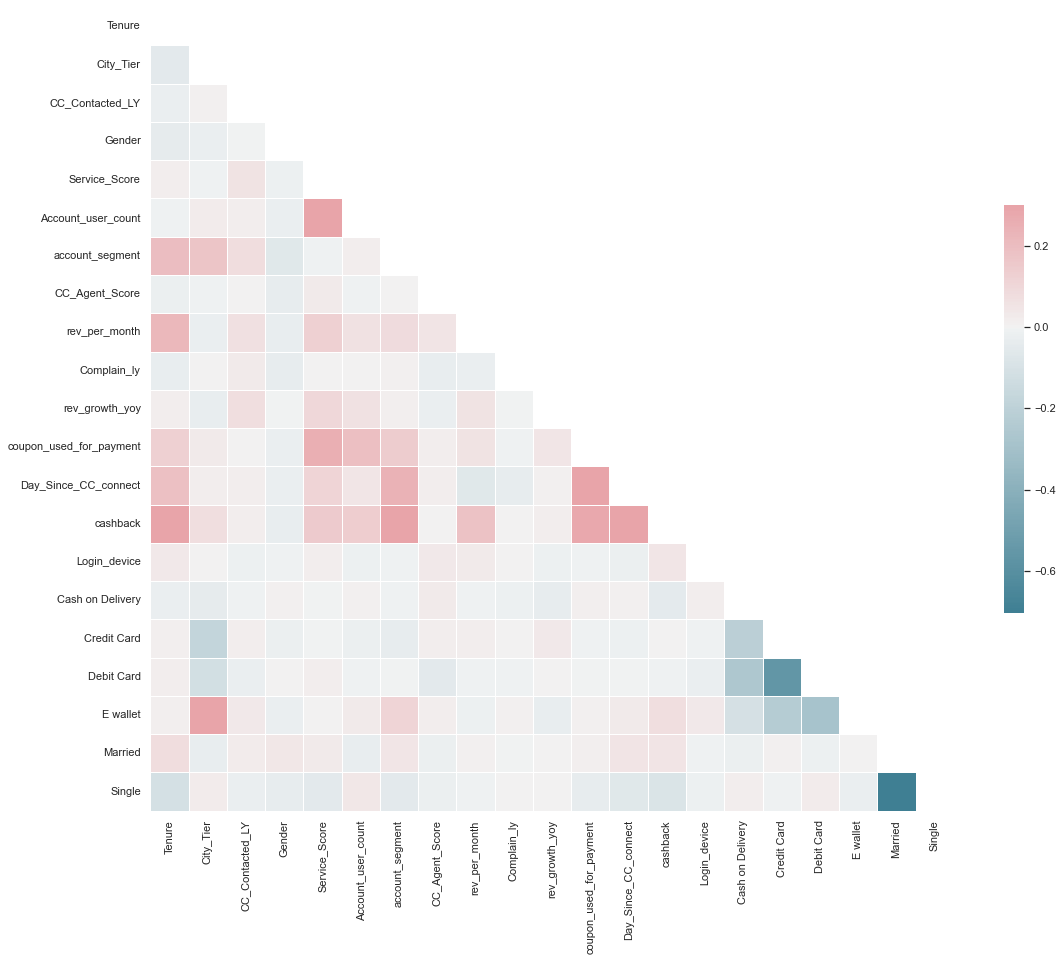

In [201]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = df.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [202]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [203]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   3.228160
1                 City_Tier   5.858939
2           CC_Contacted_LY   5.640954
3                    Gender   2.488906
4             Service_Score  19.853038
5        Account_user_count  19.995516
6           account_segment  10.262854
7            CC_Agent_Score   5.646021
8             rev_per_month   5.251661
9               Complain_ly   1.407281
10           rev_growth_yoy  16.905149
11  coupon_used_for_payment   3.263565
12     Day_Since_CC_connect   3.718850
13                 cashback  30.267838
14             Login_device   3.530248
15         Cash on Delivery   1.954753
16              Credit Card   4.224325
17               Debit Card   5.210477
18                 E wallet   2.623466
19                  Married   3.894389
20                   Single   2.717347


### Dropping Variables having VIF>5 and Recheck the VIF Values

In [204]:
X_train = X_train.drop(["rev_growth_yoy","Service_Score","Account_user_count"], axis=1)
X_test = X_test.drop(["rev_growth_yoy","Service_Score","Account_user_count"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 18)
X_test (3378, 18)


In [205]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   3.170022
1                 City_Tier   5.750259
2           CC_Contacted_LY   5.366100
3                    Gender   2.448168
4           account_segment  10.191135
5            CC_Agent_Score   5.437980
6             rev_per_month   5.104066
7               Complain_ly   1.399680
8   coupon_used_for_payment   3.122961
9      Day_Since_CC_connect   3.709056
10                 cashback  26.296948
11             Login_device   3.474859
12         Cash on Delivery   1.862018
13              Credit Card   3.863109
14               Debit Card   4.733122
15                 E wallet   2.570553
16                  Married   3.730541
17                   Single   2.592709


In [206]:
X_train = X_train.drop(["City_Tier","Gender","rev_per_month","coupon_used_for_payment","Login_device","Credit Card","Debit Card","E wallet"], axis=1)
X_test = X_test.drop(["City_Tier","Gender","rev_per_month","coupon_used_for_payment","Login_device","Credit Card","Debit Card","E wallet"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (7882, 10)
X_test (3378, 10)


# Feature Scaling:

In [207]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Building:

In [208]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Model Building:

## 1.Logistic Regression.

In [209]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [210]:
lr_eval = evaluate_model(lr, X_test, y_test)

#Evaluate results
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.8765541740674956
Precision: 0.7270029673590505
Recall: 0.4298245614035088
F1 Score: 0.5402425578831311
Cohens Kappa Score: 0.47432777069978127
Area Under Curve: 0.8432492377667817
Confusion Matrix:
 [[2716   92]
 [ 325  245]]


In [211]:
y_pred = lr.predict(X_test)

y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [212]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2716   92]
 [ 325  245]]


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

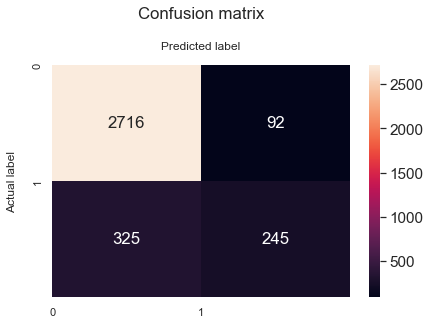

In [213]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

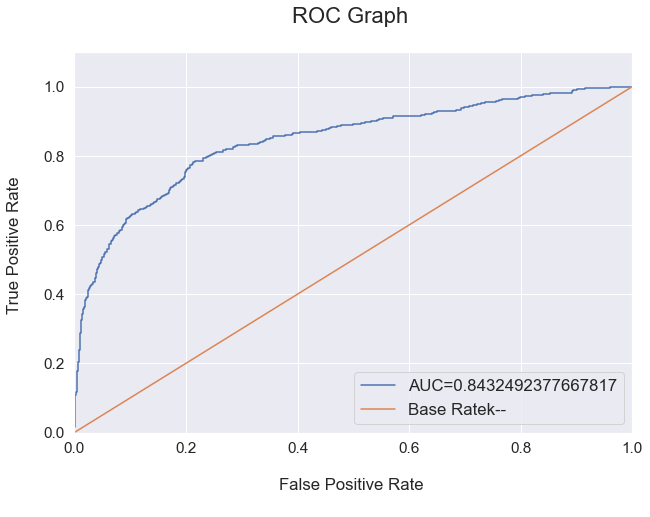

In [214]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## 2.Decison Tree.

In [215]:
dtc = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [216]:
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9396092362344582
Precision: 0.8452830188679246
Recall: 0.7859649122807018
F1 Score: 0.8145454545454546
Cohens Kappa Score: 0.7785345160046279
Area Under Curve: 0.8791566701654421
Confusion Matrix:
 [[2726   82]
 [ 122  448]]


In [217]:
y_pred = dtc.predict(X_test)

y_pred

array([0., 1., 0., ..., 1., 0., 0.])

In [218]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2726   82]
 [ 122  448]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

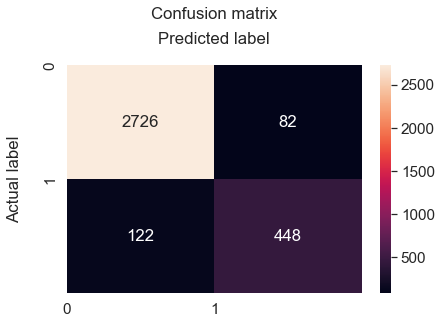

In [219]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

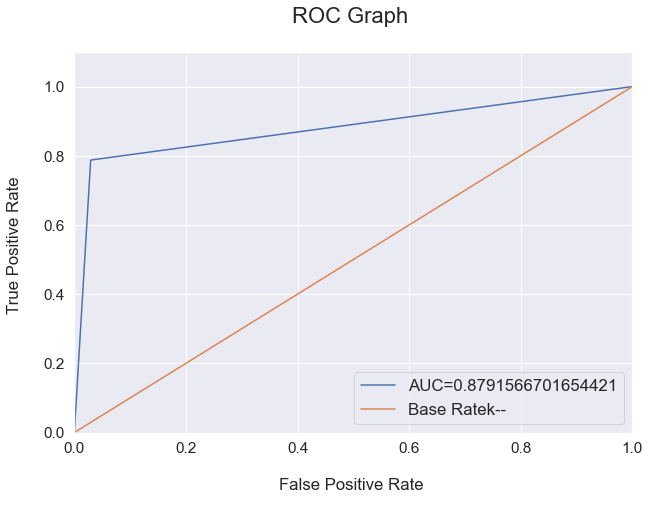

In [220]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## 3.Random Forest.

In [221]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0,n_estimators = 72, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

In [222]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9523386619301362
Precision: 0.9287211740041929
Recall: 0.7771929824561403
F1 Score: 0.8462273161413563
Cohens Kappa Score: 0.8182891600562114
Area Under Curve: 0.9813612110761233
Confusion Matrix:
 [[2774   34]
 [ 127  443]]


In [223]:
y_pred = rf.predict(X_test)

y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [224]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2774   34]
 [ 127  443]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

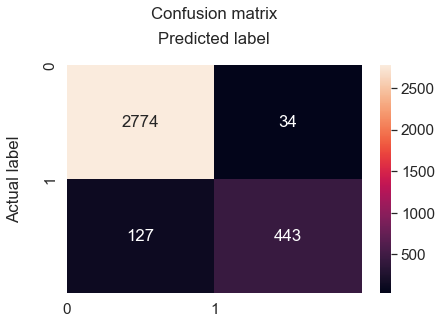

In [225]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

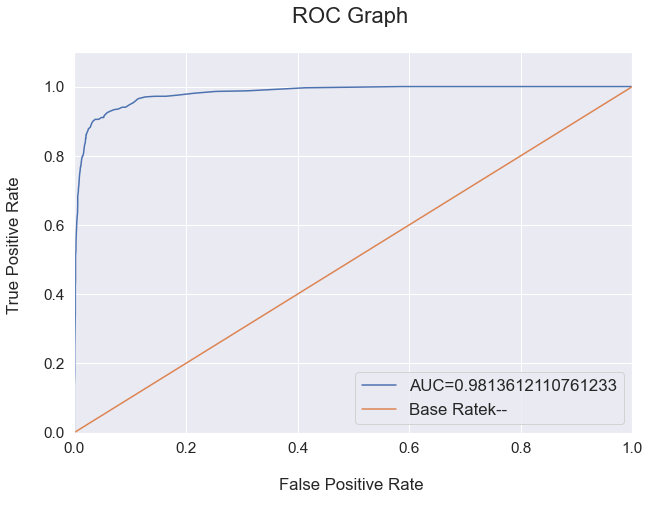

In [226]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## 4.K Neighbors(KNN).

In [227]:
knn = KNeighborsClassifier(n_neighbors = 22, 
metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [228]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8848431024274719
Precision: 0.7801857585139319
Recall: 0.4421052631578947
F1 Score: 0.5643896976483763
Cohens Kappa Score: 0.5038231582572288
Area Under Curve: 0.9156891962813015
Confusion Matrix:
 [[2737   71]
 [ 318  252]]


In [229]:
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [230]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[2737   71]
 [ 318  252]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

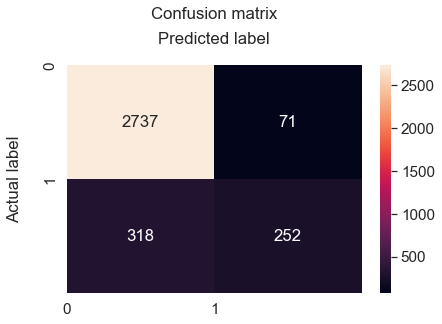

In [231]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

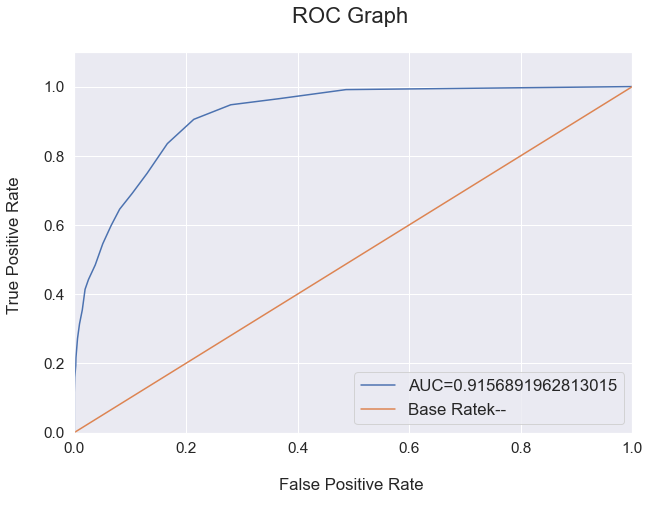

In [232]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## 5.Naive Bayes.

In [233]:
# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [234]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8383658969804618
Precision: 0.5201342281879194
Recall: 0.543859649122807
F1 Score: 0.5317324185248713
Cohens Kappa Score: 0.4341166898004116
Area Under Curve: 0.7991340530814215
Confusion Matrix:
 [[2522  286]
 [ 260  310]]


In [235]:
y_pred = nb.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 1., 1.])

In [236]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[2522  286]
 [ 260  310]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

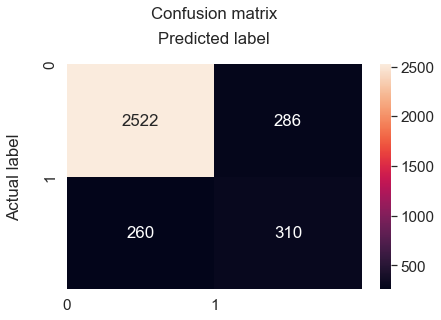

In [237]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

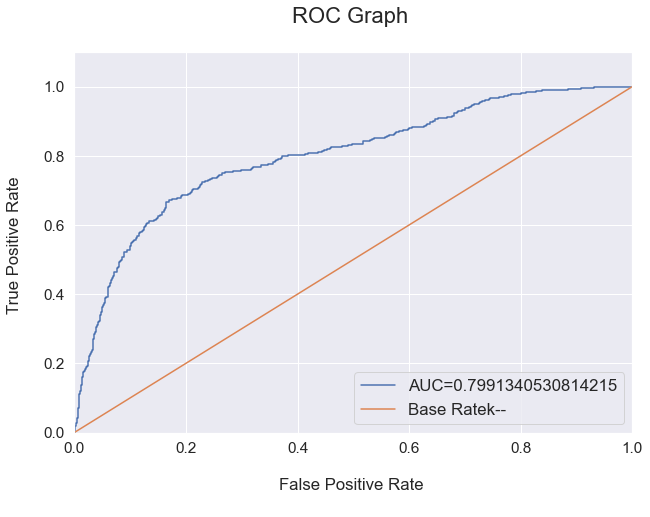

In [238]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## 6.Linear Discrimant Analysis(LDA).

In [239]:
lda = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [240]:
lda_eval = evaluate_model(lda, X_test, y_test)

#Evaluate results
print('Accuracy:', lda_eval['acc'])
print('Precision:', lda_eval['prec'])
print('Recall:', lda_eval['rec'])
print('F1 Score:', lda_eval['f1'])
print('Cohens Kappa Score:', lda_eval['kappa'])
print('Area Under Curve:', lda_eval['auc'])
print('Confusion Matrix:\n', lda_eval['cm'])

Accuracy: 0.8744819419775015
Precision: 0.7212121212121212
Recall: 0.41754385964912283
F1 Score: 0.528888888888889
Cohens Kappa Score: 0.46236036036036043
Area Under Curve: 0.8341636677162992
Confusion Matrix:
 [[2716   92]
 [ 332  238]]


In [241]:
y_pred = lda.predict(X_test)
y_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [242]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[2716   92]
 [ 332  238]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

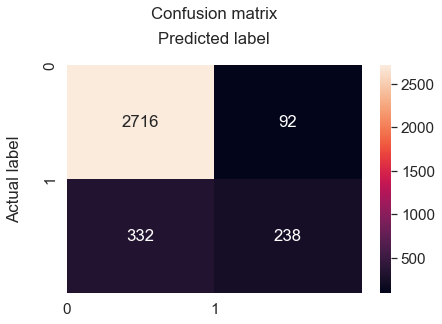

In [243]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

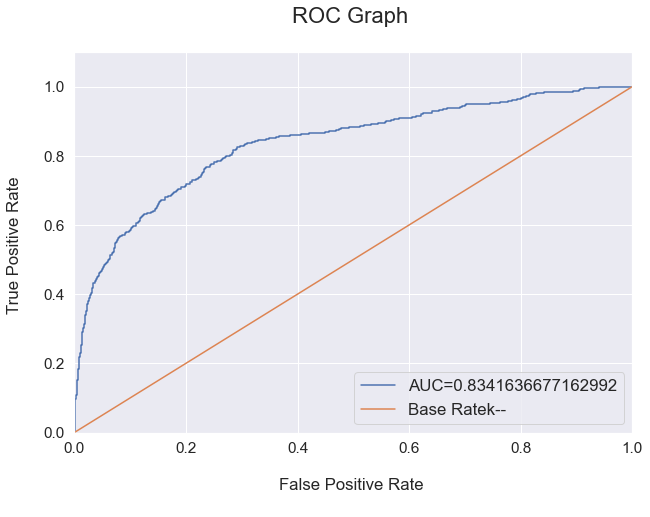

In [244]:
y_pred_proba = lda.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


# Model Comparison

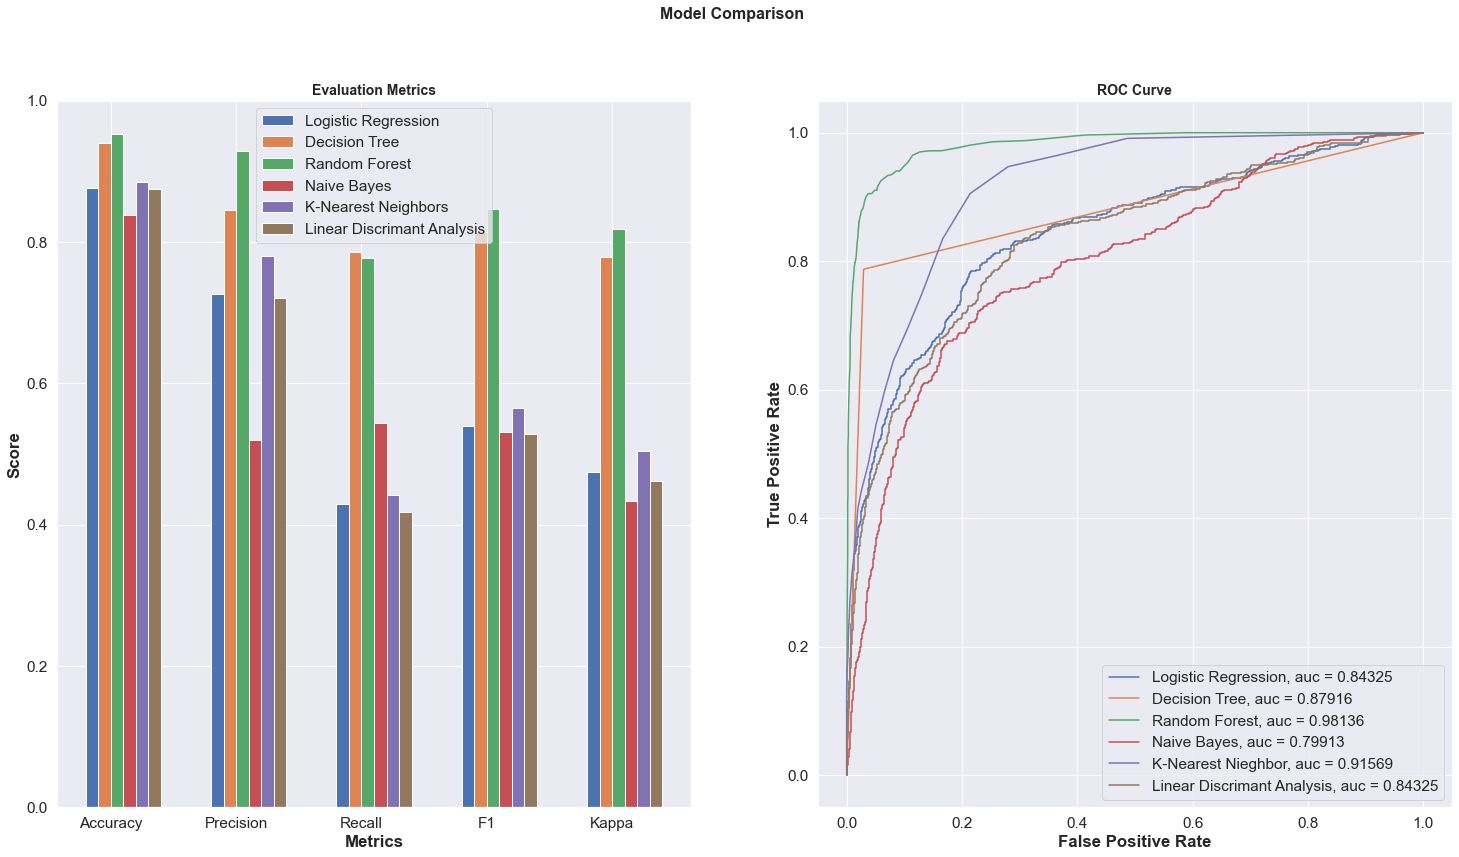

In [245]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(13)
fig.set_figwidth(25)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
lda_score = [lda_eval['acc'], lda_eval['prec'], lda_eval['rec'], lda_eval['f1'], lda_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, lda_score, width=barWidth, edgecolor='white', label='Linear Discrimant Analysis')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(lda_eval['fpr'], lda_eval['tpr'], label='Linear Discrimant Analysis, auc = {:0.5f}'.format(lr_eval['auc']))


## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

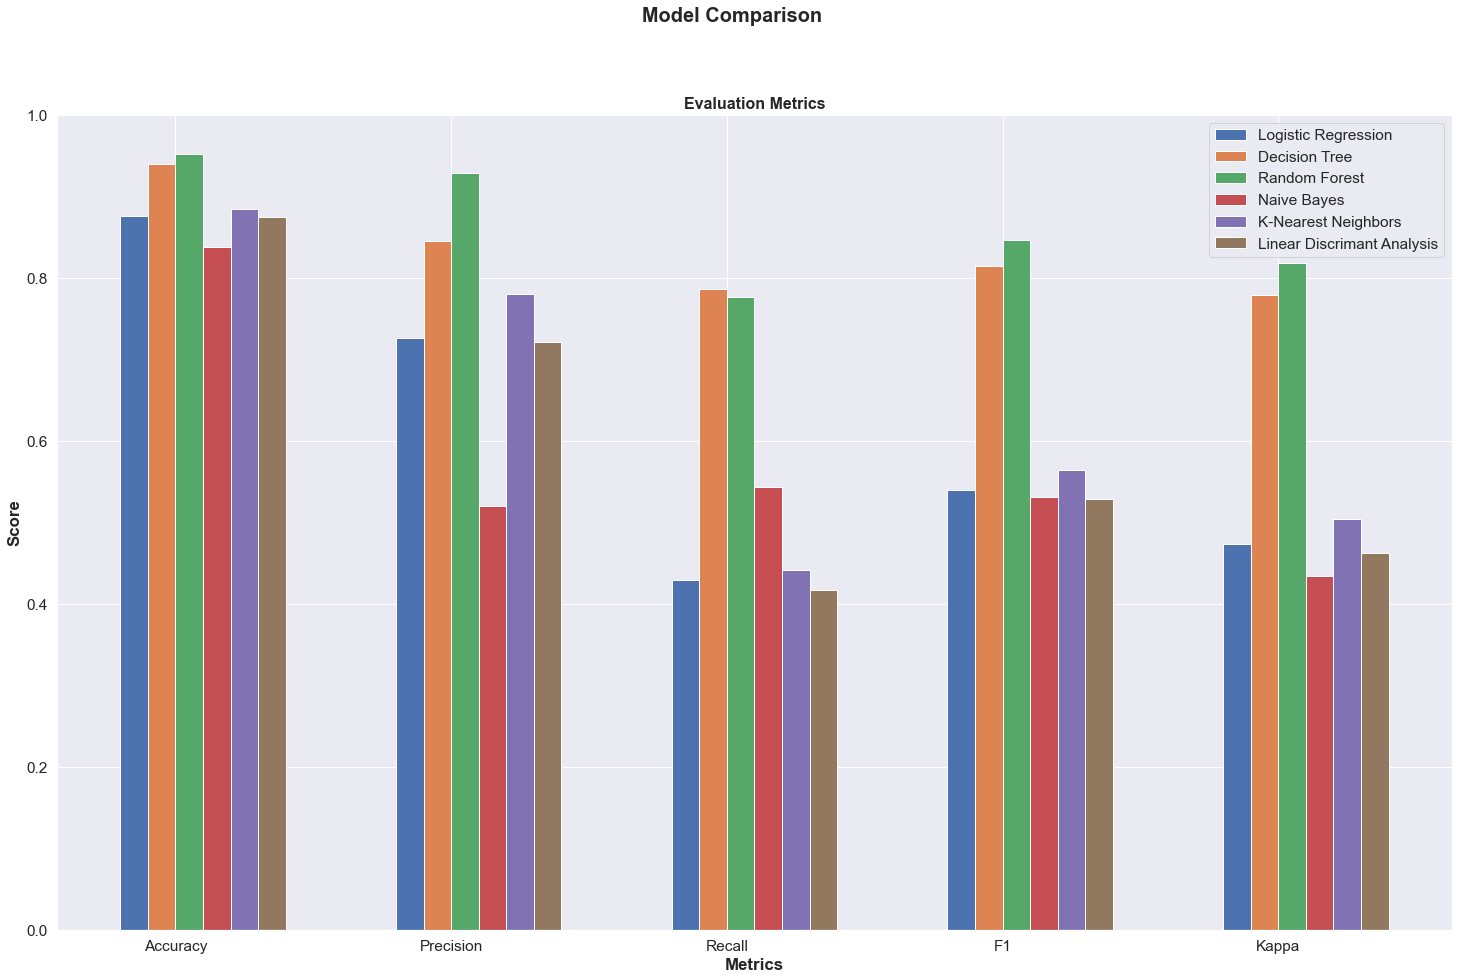

In [246]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=20, fontweight='bold')
fig.set_figheight(15)
fig.set_figwidth(25)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
lda_score = [lda_eval['acc'], lda_eval['prec'], lda_eval['rec'], lda_eval['f1'], lda_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, lda_score, width=barWidth, edgecolor='white', label='Linear Discrimant Analysis')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=16, fontweight='bold')
ax1.legend()


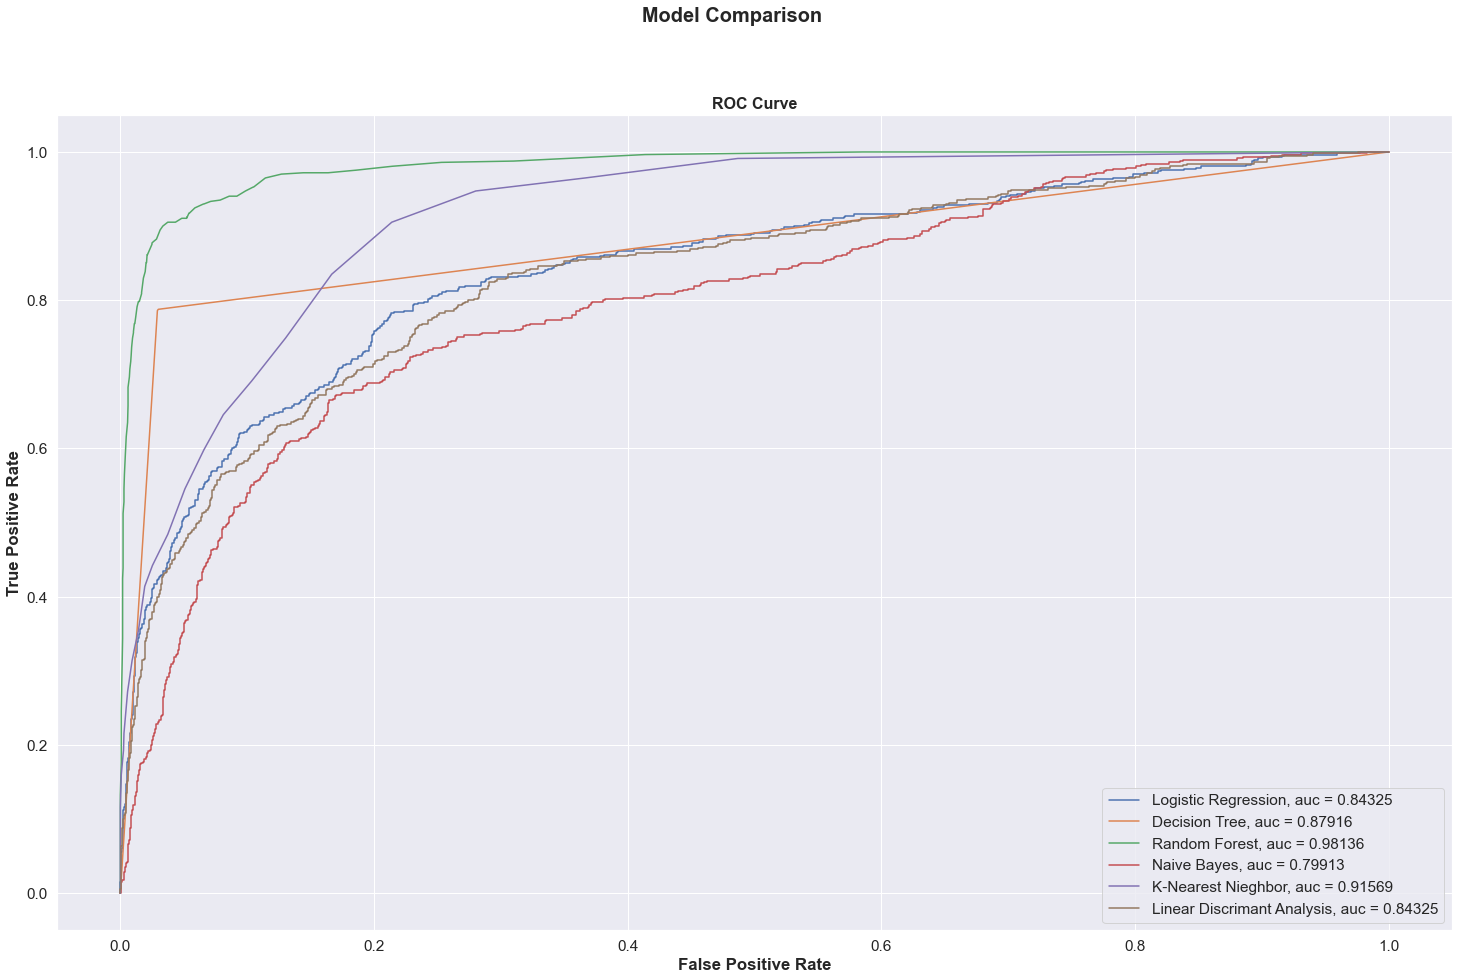

In [247]:
# Second plot
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=20, fontweight='bold')
fig.set_figheight(15)
fig.set_figwidth(25)
fig.set_facecolor('white')

## Comparing ROC Curve
ax1.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax1.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax1.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax1.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax1.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax1.plot(lda_eval['fpr'], lda_eval['tpr'], label='Linear Discrimant Analysis, auc = {:0.5f}'.format(lr_eval['auc']))


## Configure x and y axis
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax1.set_title('ROC Curve', fontsize=16, fontweight='bold')
ax1.legend(loc=4)

plt.show()

# Model Optimization Using HYPER PARAMETER TUNING:

In [248]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0,n_estimators = 72, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

In [249]:
rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9523386619301362
Precision: 0.9287211740041929
Recall: 0.7771929824561403
F1 Score: 0.8462273161413563
Cohens Kappa Score: 0.8182891600562114
Area Under Curve: 0.9813612110761233
Confusion Matrix:
 [[2774   34]
 [ 127  443]]


### The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.
max_depth = maximum number of levels allowed in each tree.
max_features = maximum number of features considered when splitting a node.
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
min_samples_split = minimum number of samples necessary in a node to cause node splitting.
n_estimators = number of trees in the ensamble.

### Here we are considering Randomized searchCV and GridSearchCV to Tune the model.

## Randomized searchCV:

In [250]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [251]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [252]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [253]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [254]:
best_random_grid=rf_randomcv.best_estimator_

In [264]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       n_estimators=1400)

In [265]:
best_random_grid_eval = evaluate_model(best_random_grid, X_test, y_test)
#Evaluate results
print('Accuracy:', best_random_grid_eval['acc'])
print('Precision:', best_random_grid_eval['prec'])
print('Recall:', best_random_grid_eval['rec'])
print('F1 Score:', best_random_grid_eval['f1'])
print('Cohens Kappa Score:', best_random_grid_eval['kappa'])
print('Area Under Curve:', best_random_grid_eval['auc'])
print('Confusion Matrix:\n', best_random_grid_eval['cm'])

Accuracy: 0.9547069271758437
Precision: 0.9426751592356688
Recall: 0.7789473684210526
F1 Score: 0.8530259365994236
Cohens Kappa Score: 0.8265400438588543
Area Under Curve: 0.9833567626330785
Confusion Matrix:
 [[2781   27]
 [ 126  444]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

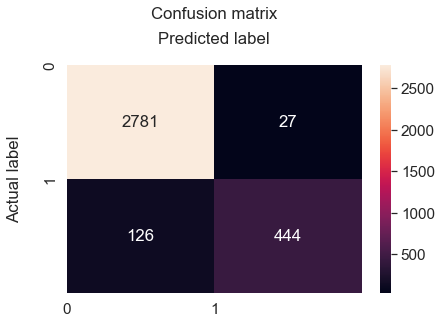

In [268]:
y_pred = best_random_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

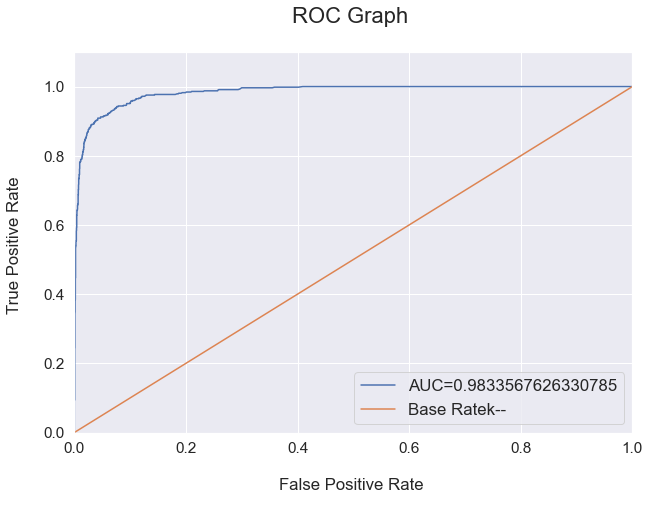

In [269]:
y_pred_proba = best_random_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


## GridSearch CV

In [256]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [257]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [258]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [259]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       n_estimators=1300)

In [260]:
best_grid=grid_search.best_estimator_

In [261]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       n_estimators=1300)

In [262]:
best_grid_eval = evaluate_model(best_grid, X_test, y_test)
#Evaluate results
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.9526346950858496
Precision: 0.9324894514767933
Recall: 0.775438596491228
F1 Score: 0.846743295019157
Cohens Kappa Score: 0.8190117979875913
Area Under Curve: 0.9837962962962963
Confusion Matrix:
 [[2776   32]
 [ 128  442]]


Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

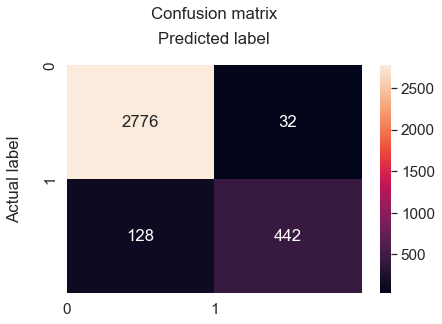

In [272]:
y_pred = best_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

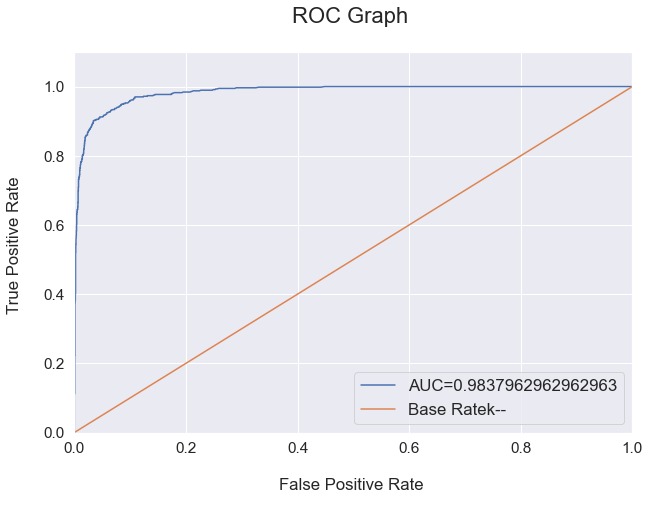

In [271]:
y_pred_proba = best_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
fig= plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


# Model Comparison

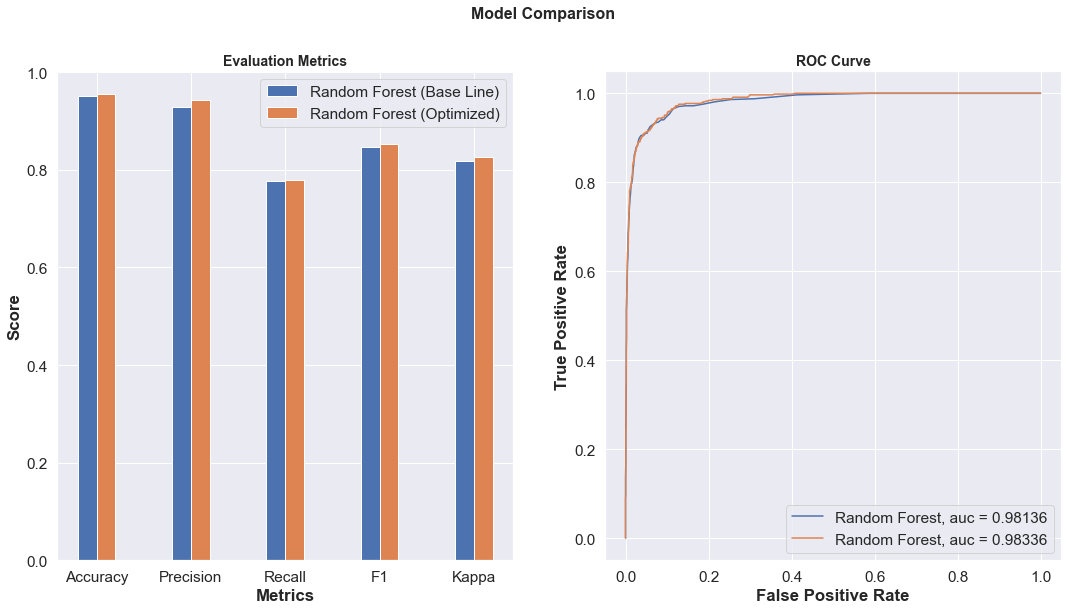

Change of 0.25% on accuracy.
Change of 1.50% on precision.
Change of 0.23% on recall.
Change of 0.80% on F1 score.
Change of 1.01% on Kappa score.
Change of 0.20% on AUC.


In [266]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(9)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_random_grid_eval['acc'], best_random_grid_eval['prec'], best_random_grid_eval['rec'], best_random_grid_eval['f1'], best_random_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_random_grid_eval['fpr'], best_random_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_random_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_random_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_random_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_random_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_random_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_random_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_random_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

# model validation

In [273]:
rf = RandomForestClassifier(random_state=0,n_estimators = 72, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

In [274]:
rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9523386619301362
Precision: 0.9287211740041929
Recall: 0.7771929824561403
F1 Score: 0.8462273161413563
Cohens Kappa Score: 0.8182891600562114
Area Under Curve: 0.9813612110761233
Confusion Matrix:
 [[2774   34]
 [ 127  443]]


# Cross Validation

In [278]:
accuracies = cross_val_score(estimator = rf,
 X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.94 (+/- 0.01)


In [295]:
# split a dataset into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=11260, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7882, 20) (3378, 20) (7882,) (3378,)


In [298]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=7882, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.944 (0.008)


# feature importance

In [294]:
features_rank.nlargest(10,'Score')

,Features,Score
0,Tenure,9806.026373
13,cashback,2545.305291
12,Day_Since_CC_connect,677.075029
9,Complain_ly,487.779337
2,CC_Contacted_LY,260.622237
20,Single,254.654287
19,Married,119.946245
7,CC_Agent_Score,76.848519
6,account_segment,51.055699
15,Cash on Delivery,48.820380


<AxesSubplot:>

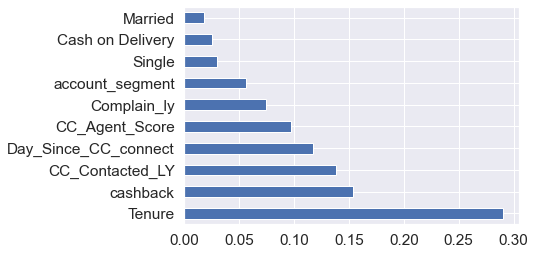

In [293]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')